In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    plt.rcParams['font.family'] = font_name
# 맥
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    plt.rc('font', family='NanumBarunGothic')

# 0. 데이터 불러오기

In [3]:
columns = ["고객 분류", "장바구니 식별 번호", "온/오프라인 구분", "제휴사 구분 코드", "구매 점포 구분 코드", "상품 코드",
           "구매 일자", "구매 시간", "구매 금액", "구매 수량", "고객 성별", "고객 연령대", "고객 거주 지역 대분류 코드",
           "상품명", "상품 대분류", "상품 중분류", "점포 지역 대분류 코드", "점포 지역 중분류 코드"]

In [4]:
# 상품 구매 정보 데이터
data1 = pd.read_csv('data/purchase_customer_category_br_info.csv', header=0, names=columns, parse_dates=[6])

# 제휴사 이용 데이터
data2 = pd.read_csv('data/cop_customer_br_info.csv', parse_dates=['구매 일자', '방문 일자'])

# 엘페이 이용 데이터
col3 = ['고객번호', '영수증번호', '제휴사', '온/오프라인 구분', '이용일자', '이용시간', '이용금액']
data3 = pd.read_csv('data/LPOINT_BIG_COMP_06_LPAY.csv', header=0, names=col3, parse_dates=[4])

C:\Users\Eugene\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (4,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1. 데이터 확인 및 결측치 처리

In [5]:
print(data1.shape)
data1.head()

(4381743, 18)


,고객 분류,장바구니 식별 번호,온/오프라인 구분,제휴사 구분 코드,구매 점포 구분 코드,상품 코드,구매 일자,구매 시간,구매 금액,구매 수량,고객 성별,고객 연령대,고객 거주 지역 대분류 코드,상품명,상품 대분류,상품 중분류,점포 지역 대분류 코드,점포 지역 중분류 코드
0,M430112881,A01000001113,1,A01,A010039,PD0290,2021-01-01,10,15000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10,Z10042
1,M646853852,A01000002265,1,A01,A010025,PD1369,2021-01-01,10,79700.0,1,여성,40대,Z13,기타주방일회용품,주방잡화,주방일회용품,Z13,Z13001
2,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10,Z10042
3,M430112881,A01000003148,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10,Z10042
4,M430112881,A01000004946,1,A01,A010039,PD0290,2021-01-01,10,19000.0,1,여성,50대,Z17,남성티셔츠,남성의류,남성의류상의,Z10,Z10042


In [6]:
print(data2.shape)
data2.head()

(248304, 14)


,고객 분류,구매 고유 식별번호,제휴사 구분 코드,구매 점포 구분 코드,온/오프라인 구분,구매 일자,방문 일자,구매 시간,구매 금액,고객 성별,고객 연령대,고객 거주 지역 대분류 코드,점포 지역 대분류 코드,점포 지역 중분류 코드
0,M839993508,21102612B015763935,B01,B010012,1,2021-10-26,2021-10-26,12,60000,남성,70대,Z17,Z17,Z17024
1,M839993508,21110610B014219744,B01,B010012,1,2021-11-06,2021-11-06,10,17100,남성,70대,Z17,Z17,Z17024
2,M839993508,21021112B013419710,B01,B010012,1,2021-02-11,2021-02-11,12,136500,남성,70대,Z17,Z17,Z17024
3,M839993508,21092010B012637545,B01,B010012,1,2021-09-20,2021-09-20,10,34200,남성,70대,Z17,Z17,Z17024
4,M839993508,21101009D015920171,D01,D010614,1,2021-10-10,2021-10-10,9,2500,남성,70대,Z17,Z17,Z17018


In [7]:
print(data3.shape)
data3.head()

(353184, 7)


,고객번호,영수증번호,제휴사,온/오프라인 구분,이용일자,이용시간,이용금액
0,M629656521,210803210311226,A03,1,2021-08-03,21,10900
1,M216016456,210803130167542,L01,2,2021-08-03,13,6860
2,M205142844,210803140275112,A02,1,2021-08-03,14,9000
3,M737010483,210803040637594,A06,2,2021-08-03,4,36740
4,M707775545,210803140675502,A06,2,2021-08-03,14,138500


## 결측치 처리

In [8]:
# data1 결측치 확인
data1.isna().sum()

고객 분류                   0
장바구니 식별 번호              0
온/오프라인 구분               0
제휴사 구분 코드               0
구매 점포 구분 코드        428501
상품 코드                   0
구매 일자                   0
구매 시간                   0
구매 금액                   0
구매 수량                   0
고객 성별                   0
고객 연령대                  0
고객 거주 지역 대분류 코드         0
상품명                     0
상품 대분류                  0
상품 중분류                  0
점포 지역 대분류 코드       428501
점포 지역 중분류 코드       428501
dtype: int64

In [9]:
# data2 결측치 확인
data2.isna().sum()

고객 분류               0
구매 고유 식별번호          0
제휴사 구분 코드           0
구매 점포 구분 코드        55
온/오프라인 구분           0
구매 일자               0
방문 일자               0
구매 시간               0
구매 금액               0
고객 성별               0
고객 연령대              0
고객 거주 지역 대분류 코드     0
점포 지역 대분류 코드       55
점포 지역 중분류 코드       55
dtype: int64

In [10]:
data3.isna().sum()

고객번호         0
영수증번호        0
제휴사          0
온/오프라인 구분    0
이용일자         0
이용시간         0
이용금액         0
dtype: int64

### 01) 상품 구매 정보 데이터

In [11]:
# 온라인 채널(2)의 점포코드 확인
len(data1.loc[data1['온/오프라인 구분'] == 2]) == len(data1.loc[data1['구매 점포 구분 코드'].isna()])

True

In [12]:
data1['점포 지역 대분류 코드'].unique()

array(['Z10', 'Z13', 'Z11', 'Z16', 'Z09', 'Z06', 'Z17', 'Z02', 'Z14',
       'Z08', nan, 'Z03', 'Z15', 'Z04', 'Z12', 'Z05', 'Z01', 'Z07'],
      dtype=object)

In [13]:
# '온라인 구매' 코드 추가
data1.loc[data1['온/오프라인 구분'] == 2, '구매 점포 구분 코드'] = 'F000000'
data1.loc[data1['온/오프라인 구분'] == 2, '점포 지역 대분류 코드'] = 'Z00'
data1.loc[data1['온/오프라인 구분'] == 2, '점포 지역 중분류 코드'] = 'Z00000'

In [14]:
# 결측치가 잘 채워졌는지 확인
data1.isna().sum()

고객 분류              0
장바구니 식별 번호         0
온/오프라인 구분          0
제휴사 구분 코드          0
구매 점포 구분 코드        0
상품 코드              0
구매 일자              0
구매 시간              0
구매 금액              0
구매 수량              0
고객 성별              0
고객 연령대             0
고객 거주 지역 대분류 코드    0
상품명                0
상품 대분류             0
상품 중분류             0
점포 지역 대분류 코드       0
점포 지역 중분류 코드       0
dtype: int64

### 02) 제휴사 이용 정보 데이터

In [15]:
len(data2.loc[data2['온/오프라인 구분'] == 2]) == len(data2.loc[data2['구매 점포 구분 코드'].isna()])

False

In [16]:
data2.loc[(data2['온/오프라인 구분'] == 2)&(~data2['구매 점포 구분 코드'].isna())]

,고객 분류,구매 고유 식별번호,제휴사 구분 코드,구매 점포 구분 코드,온/오프라인 구분,구매 일자,방문 일자,구매 시간,구매 금액,고객 성별,고객 연령대,고객 거주 지역 대분류 코드,점포 지역 대분류 코드,점포 지역 중분류 코드
73,M872147557,21091114C013073600,C01,C010011,2,2021-09-11,2021-09-11,14,7000,남성,70대,Z17,Z17,Z17018
74,M872147557,21033018C012157879,C01,C010011,2,2021-03-30,2021-03-31,18,5000,남성,70대,Z17,Z17,Z17018
75,M872147557,21040514C015459835,C01,C010011,2,2021-04-05,2021-04-05,14,5000,남성,70대,Z17,Z17,Z17018
76,M872147557,21041116C015155208,C01,C010011,2,2021-04-11,2021-04-11,16,5000,남성,70대,Z17,Z17,Z17018
77,M872147557,21042123C013357000,C01,C010011,2,2021-04-21,2021-04-22,23,5000,남성,70대,Z17,Z17,Z17018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248291,M482814653,21120413C010941881,C01,C010010,2,2021-12-04,2021-12-05,13,4000,여성,50대,Z17,Z17,Z17006
248292,M482814653,21121311C011214816,C01,C010010,2,2021-12-13,2021-12-16,11,14000,여성,50대,Z17,Z17,Z17006
248301,M014154595,21121209C015324520,C01,C010087,2,2021-12-12,2021-12-12,9,2000,여성,30대,Z12,Z14,Z14005
248302,M510878172,21112719C013369102,C01,C010007,2,2021-11-27,2021-11-27,19,6000,남성,20대,Z17,Z17,Z17013


In [17]:
data2.loc[(data2['온/오프라인 구분'] == 2)&(data2['구매 점포 구분 코드'].isna())]

,고객 분류,구매 고유 식별번호,제휴사 구분 코드,구매 점포 구분 코드,온/오프라인 구분,구매 일자,방문 일자,구매 시간,구매 금액,고객 성별,고객 연령대,고객 거주 지역 대분류 코드,점포 지역 대분류 코드,점포 지역 중분류 코드
15016,M630101164,21042615E011416951,E01,NaN,2,2021-04-26,2021-04-26,15,100000,남성,40대,Z05,NaN,NaN
21186,M313325679,21020312E011619104,E01,NaN,2,2021-02-03,2021-02-03,12,127520,남성,40대,Z10,NaN,NaN
23873,M793953321,21021921E015310194,E01,NaN,2,2021-02-19,2021-02-19,21,121740,여성,40대,Z12,NaN,NaN
30631,M678403253,21060909E010937719,E01,NaN,2,2021-06-09,2021-06-09,9,3200,여성,40대,Z17,NaN,NaN
36269,M494040767,21101514E015540811,E01,NaN,2,2021-10-15,2021-10-15,14,41141,여성,40대,Z10,NaN,NaN
44903,M084446445,21052615E012715245,E01,NaN,2,2021-05-26,2021-05-26,15,131000,남성,30대,Z17,NaN,NaN
63168,M575929312,21062612E013439075,E01,NaN,2,2021-06-26,2021-06-26,12,332200,남성,30대,Z16,NaN,NaN
66167,M384121563,21050321E013229600,E01,NaN,2,2021-05-03,2021-05-03,21,255450,여성,40대,Z10,NaN,NaN
71232,M367955928,21011800E012415389,E01,NaN,2,2021-01-18,2021-01-18,0,146600,남성,30대,Z10,NaN,NaN
71337,M309456946,21021717E013046788,E01,NaN,2,2021-02-17,2021-02-17,17,41750,여성,30대,Z17,NaN,NaN


In [18]:
# '온라인 구매' 코드 추가
data2.loc[data2['구매 점포 구분 코드'].isna(), '구매 점포 구분 코드'] = 'F000000'
data2.loc[data2['점포 지역 대분류 코드'].isna(), '점포 지역 대분류 코드'] = 'Z00'
data2.loc[data2['점포 지역 중분류 코드'].isna(), '점포 지역 중분류 코드'] = 'Z00000'

In [19]:
# 결측치가 잘 채워졌는지 확인
data2.isna().sum()

고객 분류              0
구매 고유 식별번호         0
제휴사 구분 코드          0
구매 점포 구분 코드        0
온/오프라인 구분          0
구매 일자              0
방문 일자              0
구매 시간              0
구매 금액              0
고객 성별              0
고객 연령대             0
고객 거주 지역 대분류 코드    0
점포 지역 대분류 코드       0
점포 지역 중분류 코드       0
dtype: int64

# 2. Description

## 구매 데이터 전체 (data1+data2)

In [20]:
# 유통 + 나머지 데이터 병합
data = pd.concat([data1, data2])

In [21]:
# 기간
print(min(data['구매 일자'].dt.date), '~', max(data['구매 일자'].dt.date))

2020-12-27 ~ 2021-12-31


In [22]:
data['고객 성별'].value_counts()

여성    3277380
남성    1352667
Name: 고객 성별, dtype: int64

In [23]:
data['고객 연령대'].value_counts()

40대    1935961
30대    1097859
50대     943890
20대     285966
60대     276113
70대      90258
Name: 고객 연령대, dtype: int64

## 유통 (data1)

In [24]:
data1['장바구니 식별 번호'].value_counts().to_frame()

,장바구니 식별 번호
A02090597964,109
A02237644368,93
A02350722306,91
A02232705930,82
A02018116148,82
...,...
A02017109238,1
A02017111496,1
A01146402832,1
A01146401788,1


In [25]:
data1['고객 성별'].value_counts().to_frame()

,고객 성별
여성,3113629
남성,1268114


In [26]:
data1.groupby(['고객 연령대', '고객 성별'])['구매 금액'].agg(['count', 'sum', 'mean'])

count           sum          mean
고객 연령대 고객 성별                                     
20대    남성       77399  1.603222e+09  20713.730035
       여성      174780  4.522257e+09  25873.993752
30대    남성      308979  7.975680e+09  25813.017490
       여성      715842  1.770621e+10  24734.804476
40대    남성      535782  1.220581e+10  22781.307476
       여성     1301920  2.811409e+10  21594.332235
50대    남성      250495  5.551428e+09  22161.832771
       여성      658726  1.487408e+10  22580.068693
60대    남성       67366  2.033539e+09  30186.428955
       여성      201950  5.246546e+09  25979.428121
70대    남성       28093  4.876668e+08  17359.013882
       여성       60411  1.390838e+09  23022.928722

## 유통 외 제휴사 (data2)

In [27]:
data2['고객 성별'].value_counts().to_frame()

,고객 성별
여성,163751
남성,84553


In [28]:
data2.groupby(['고객 연령대', '고객 성별'])['구매 금액'].agg(['count', 'sum', 'mean'])

count         sum          mean
고객 연령대 고객 성별                                 
20대    남성     12674   197196851  15559.164510
       여성     21113   312100179  14782.370056
30대    남성     26645   622866547  23376.488910
       여성     46393  1021998491  22029.152911
40대    남성     30710   725039461  23609.230251
       여성     67549  1199050316  17750.822603
50대    남성     11513   256278875  22259.956137
       여성     23156   401286193  17329.685308
60대    남성      2251    59651224  26499.877388
       여성      4546   139584373  30704.877475
70대    남성       760    41511399  54620.261842
       여성       994    21959645  22092.198189

In [29]:
data2.loc[data2['구매 일자']!=data2['방문 일자']]['제휴사 구분 코드'].unique()

array(['C01'], dtype=object)

- 구매일자와 방문일자가 다른 제휴사는 엔터테인먼트임.

## L.POINT 이용 데이터

In [30]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353184 entries, 0 to 353183
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   고객번호       353184 non-null  object        
 1   영수증번호      353184 non-null  int64         
 2   제휴사        353184 non-null  object        
 3   온/오프라인 구분  353184 non-null  int64         
 4   이용일자       353184 non-null  datetime64[ns]
 5   이용시간       353184 non-null  int64         
 6   이용금액       353184 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 18.9+ MB


In [31]:
data3.describe()

,영수증번호,온/오프라인 구분,이용시간,이용금액
count,3.531840e+05,353184.000000,353184.000000,3.531840e+05
mean,2.106709e+14,1.575264,14.707931,6.081179e+04
std,3.376498e+11,0.494304,5.215817,3.417790e+05
min,2.101010e+14,1.000000,0.000000,5.000000e+00
25%,2.104082e+14,1.000000,12.000000,7.450000e+03
50%,2.106302e+14,2.000000,15.000000,2.000000e+04
75%,2.109301e+14,2.000000,19.000000,4.859050e+04
max,2.112312e+14,2.000000,23.000000,3.000000e+07


In [32]:
data3['온/오프라인 구분'].value_counts()

2    203174
1    150010
Name: 온/오프라인 구분, dtype: int64

# 3. Visualization

## 전체 추이

In [33]:
def date_counter(df, col_name, title):
    date_count = df[col_name].value_counts().sort_index()
    plt.figure(figsize = (15,5))
    sns.lineplot(data=date_count)
    plt.title(title, fontsize=14)

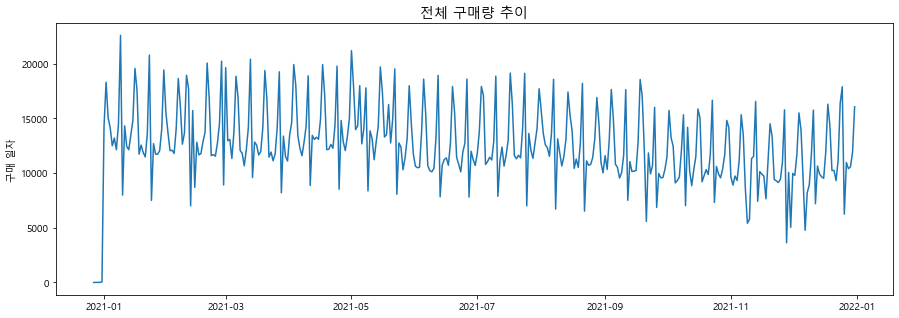

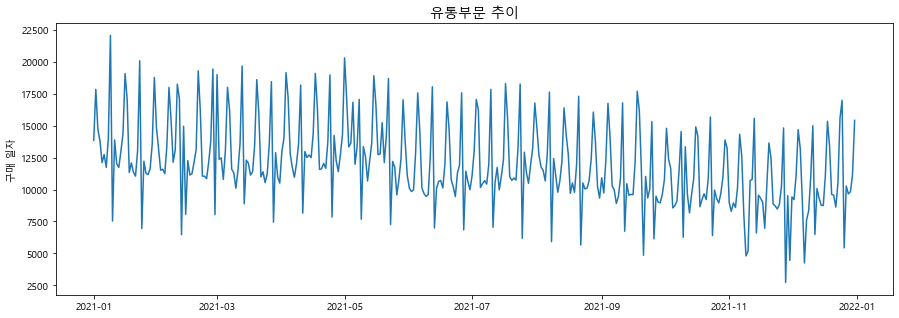

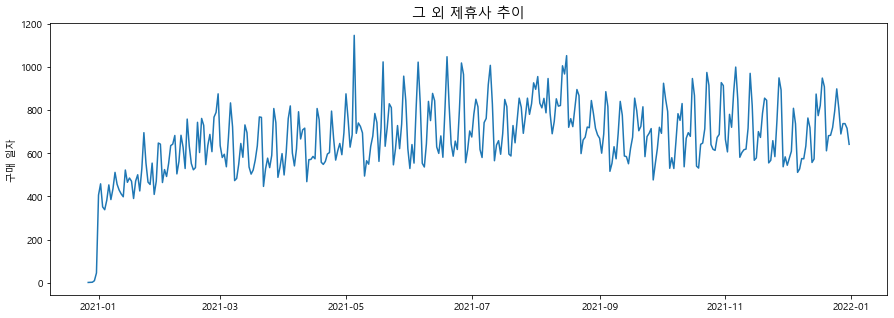

In [34]:
date_counter(data, '구매 일자', '전체 구매량 추이')
date_counter(data1, '구매 일자', '유통부문 추이')
date_counter(data2, '구매 일자', '그 외 제휴사 추이')

- 유통부문 구매량 감소에 따라 전체 구매량이 감소함

### ★ 장바구니 당 구매량 추이

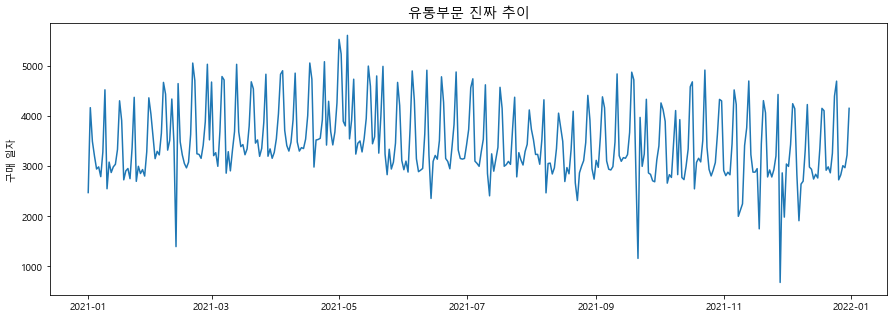

In [35]:
df_ut = data1[["고객 분류", "장바구니 식별 번호", "온/오프라인 구분", "제휴사 구분 코드", "구매 점포 구분 코드",
           "구매 일자", "구매 시간", "고객 성별", "고객 연령대", "고객 거주 지역 대분류 코드",
           "점포 지역 대분류 코드", "점포 지역 중분류 코드"]].drop_duplicates()

date_counter(df_ut, '구매 일자', '유통부문 진짜 추이')

In [36]:
# 유통부문에서 구매량이 적은 날
df_ut_date = df_ut['구매 일자'].value_counts().to_frame()
df_ut_date.loc[df_ut_date['구매 일자']<1700].sort_index()

,구매 일자
2021-02-12,1392
2021-09-21,1157
2021-11-28,677


<AxesSubplot:xlabel='제휴사 구분 코드', ylabel='Count'>

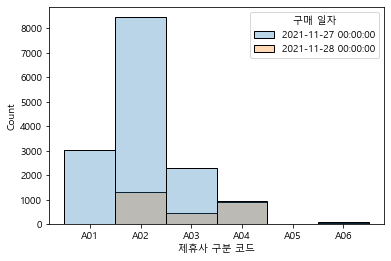

In [37]:
# 11월 27일 대비 11월 28일 데이터
df_1128 = data1.loc[(data1['구매 일자']=='2021-11-27')|(data1['구매 일자']=='2021-11-28')][['구매 일자', '제휴사 구분 코드']]

sns.histplot(data=df_1128, x='제휴사 구분 코드', hue='구매 일자', alpha=0.3)

- 11월 28일의 경우 제휴사 'A01', 'A02', 'A03'에 의해 전일 대비 구매가 적다.

In [38]:
# 제휴사 구분 코드에 맞춰 엽종 컬럼 생성
jh = {'A': '유통', 'B': '숙박업종', 'C': '엔터테인먼트', 'D': 'F&B', 'E': '렌탈업종', 'L': '기타 제휴사'}

data2['제휴사'] = data2['제휴사 구분 코드'].apply(lambda x: jh[x[0]])

In [39]:
# 업종별 구매량 추이 시각화 함수
def date_counter_section(df, section, col_name, title):
    date_count = df[df['제휴사']==section][col_name].value_counts().sort_index()
    plt.figure(figsize = (15,5))
    sns.lineplot(data=date_count)
    plt.title(title+' - '+section, fontsize=14)

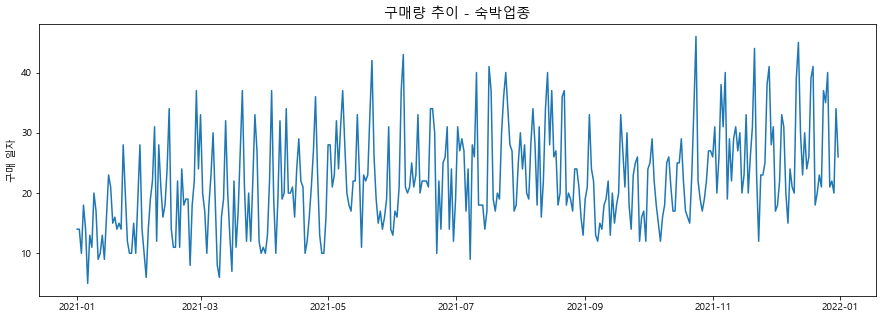

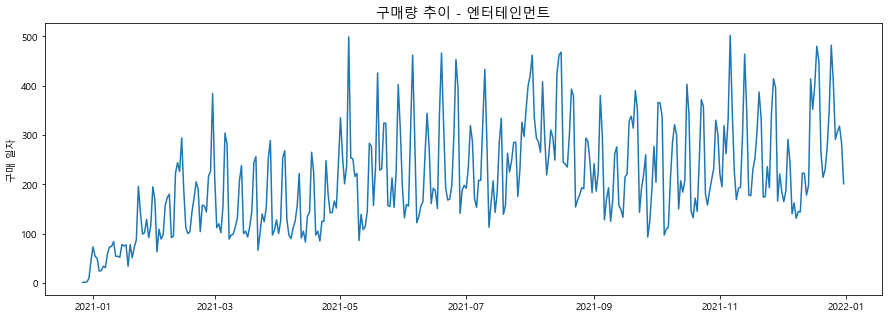

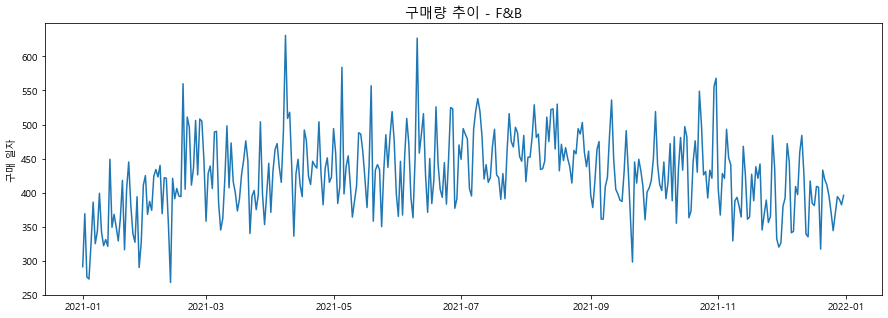

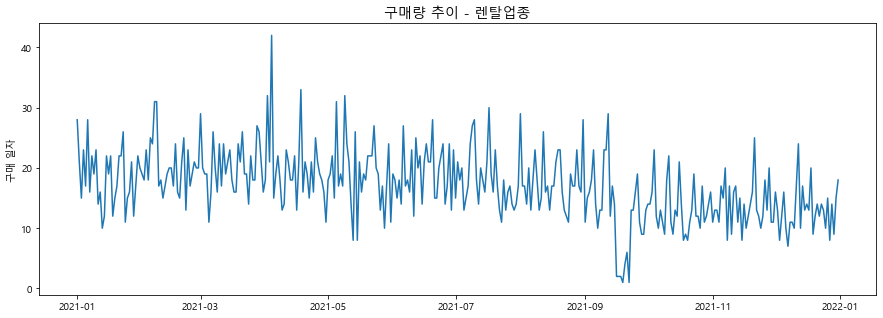

In [40]:
date_counter_section(data2, '숙박업종', '구매 일자', '구매량 추이')
date_counter_section(data2, '엔터테인먼트', '구매 일자', '구매량 추이')
date_counter_section(data2, 'F&B', '구매 일자', '구매량 추이')
date_counter_section(data2, '렌탈업종', '구매 일자', '구매량 추이')

In [41]:
# 렌탈업종 구매량이 5건 미만인 일자
dec2 = data2.loc[data2['제휴사']=='렌탈업종']['구매 일자'].value_counts().to_frame()
dec2.loc[dec2['구매 일자']<5].sort_index()

,구매 일자
2021-09-16,2
2021-09-17,2
2021-09-18,2
2021-09-19,1
2021-09-20,4
2021-09-22,1


- 추석 기간(21.09.19 ~ 21.09.22) 렌탈업종 구매량이 적다.

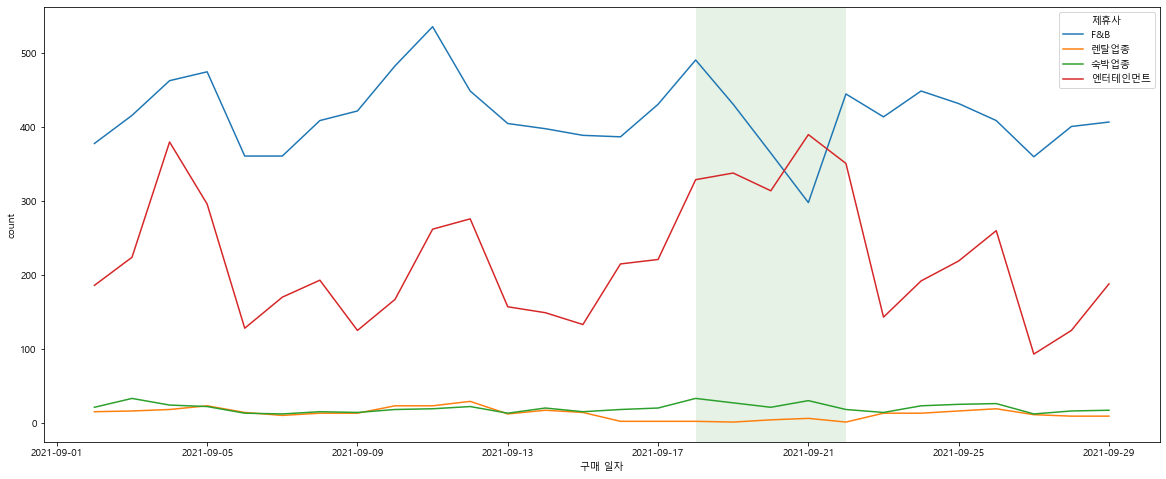

In [42]:
period = ('2021-09-01'<data2['구매 일자'])&(data2['구매 일자']<'2021-09-30')
df_per = data2.loc[period].groupby(['제휴사', '구매 일자'])['구매 일자'].agg(['count']).reset_index()

plt.figure(figsize=(20, 8))
sns.lineplot(data=df_per, x='구매 일자', y='count', hue='제휴사')
plt.axvspan('2021-09-18', '2021-09-22', facecolor='g', alpha=0.1)

In [43]:
# 렌탈업종 구매량 35건 이상 일자
dec2.loc[dec2['구매 일자']>35]

,구매 일자
2021-04-04,42


Text(0.5, 1.0, '성별 구매량 추이')

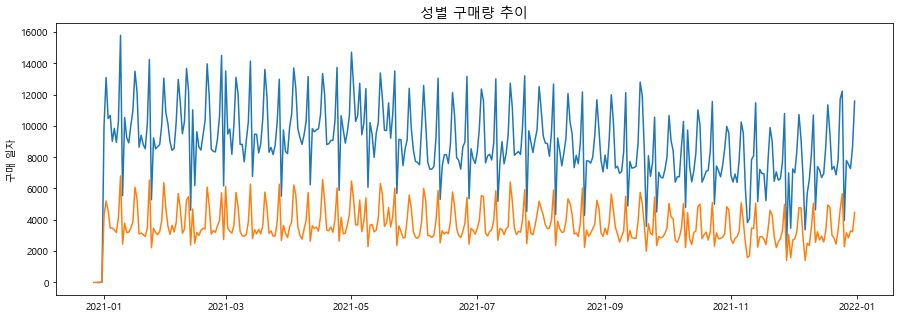

In [44]:
date_count_f = data[data['고객 성별']=='여성']['구매 일자'].value_counts().sort_index()
date_count_m = data[data['고객 성별']=='남성']['구매 일자'].value_counts().sort_index()

plt.figure(figsize = (15,5))
sns.lineplot(data=date_count_f)
sns.lineplot(data=date_count_m)
plt.title('성별 구매량 추이', fontsize=14)

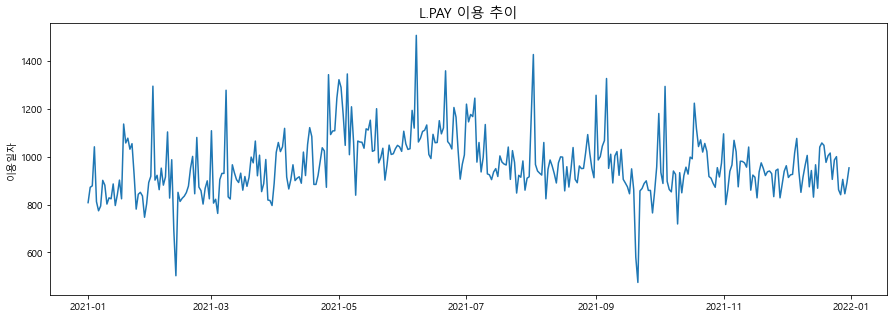

In [45]:
date_counter(data3, '이용일자', 'L.PAY 이용 추이')

In [46]:
# L.Pay 이용량이 600건 미만인 일자
dec3 = data3['이용일자'].value_counts().to_frame()
dec3.loc[dec3['이용일자']<600]

,이용일자
2021-09-20,580
2021-02-12,503
2021-09-21,475


- L.PAY 이용량 역시 설날(21.02.12)과 추석 연휴 동안 감소한다.

In [47]:
# L.Pay 이용량이 1300건 이상 일자
inc3 = data3['이용일자'].value_counts().to_frame()
inc3.loc[inc3['이용일자']>1300].sort_index()

,이용일자
2021-04-26,1342
2021-05-01,1321
2021-05-05,1345
2021-06-07,1506
2021-06-21,1358
2021-08-02,1426
2021-09-06,1326


<AxesSubplot:title={'center':'일별 L.pay 이용량'}, xlabel='이용일자', ylabel='count'>

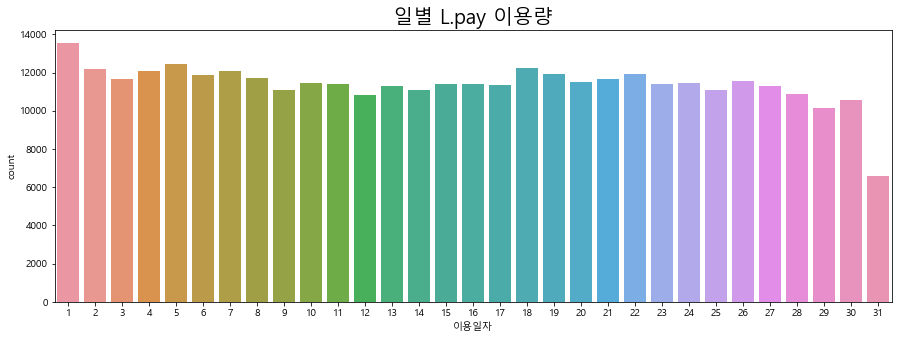

In [48]:
day3 = data3['이용일자'].dt.day.to_frame()
plt.figure(figsize=(15, 5))
plt.title('일별 L.pay 이용량', fontsize=20)
sns.countplot(data=day3, x='이용일자')

In [49]:
data3['제휴사 구분'] = data3['제휴사'].apply(lambda x: '비 제휴사' if x=='L01' else jh[x[0]])

<AxesSubplot:xlabel='이용일자', ylabel='count'>

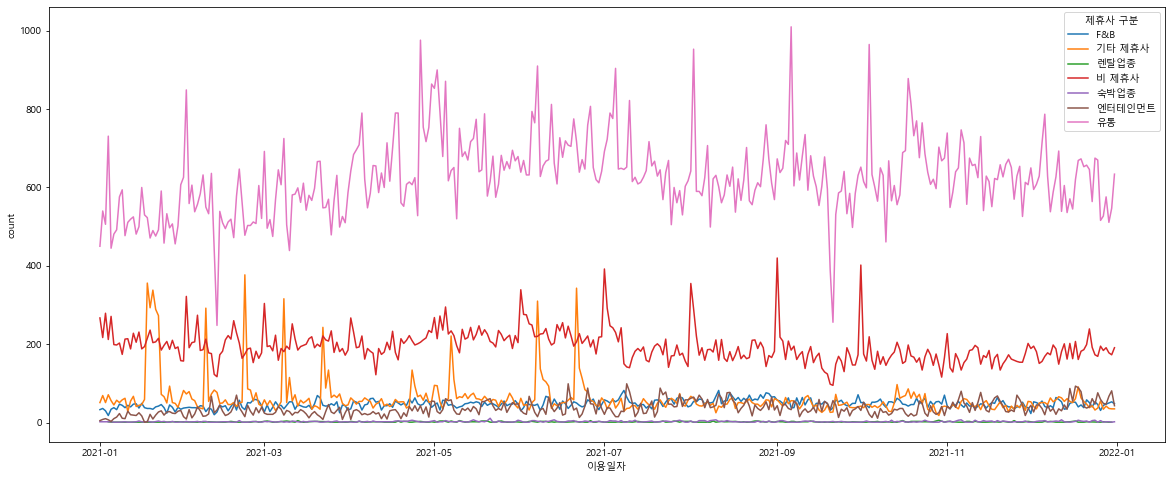

In [50]:
df_lpay = data3.groupby(['제휴사 구분', '이용일자'])['이용일자'].agg(['count']).reset_index()

plt.figure(figsize=(20, 8))
sns.lineplot(data=df_lpay, x='이용일자', y='count', hue='제휴사 구분')

<AxesSubplot:xlabel='이용일자', ylabel='count'>

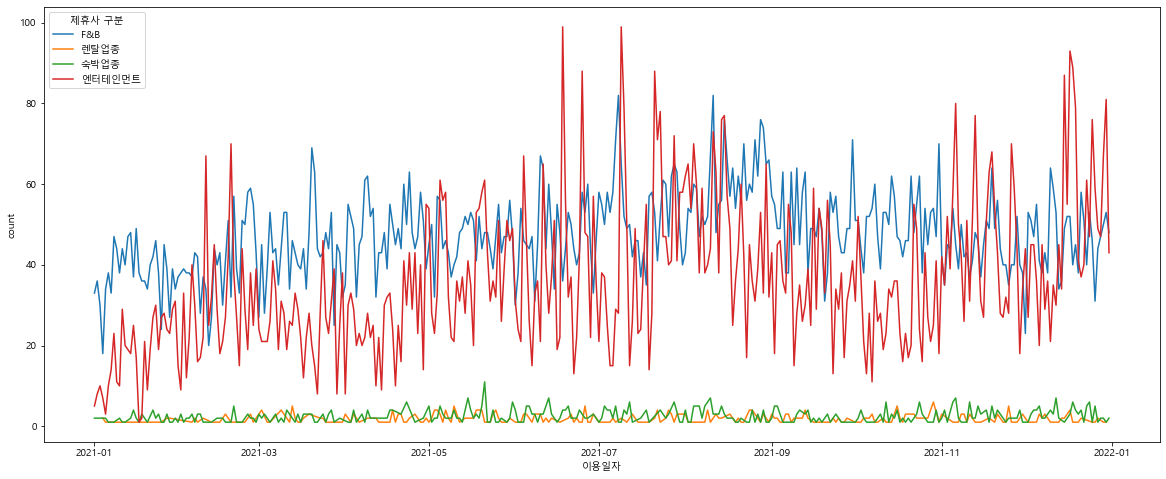

In [51]:
exc = (data3['제휴사 구분']!='유통')&(data3['제휴사 구분']!='비 제휴사')&(data3['제휴사 구분']!='기타 제휴사')
df_lpay = data3.loc[exc].groupby(['제휴사 구분', '이용일자'])['이용일자'].agg(['count']).reset_index()

plt.figure(figsize=(20, 8))
sns.lineplot(data=df_lpay, x='이용일자', y='count', hue='제휴사 구분')

In [52]:
df_lpay.loc[df_lpay['count']>85]

,제휴사 구분,이용일자,count
1094,엔터테인먼트,2021-06-18,99
1101,엔터테인먼트,2021-06-25,88
1115,엔터테인먼트,2021-07-09,99
1127,엔터테인먼트,2021-07-21,88
1274,엔터테인먼트,2021-12-15,87
1276,엔터테인먼트,2021-12-17,93
1277,엔터테인먼트,2021-12-18,89


## 날짜/시간별

### 1. 전체

In [53]:
data['Month'] = data['구매 일자'].dt.month
data['DayofWeek'] = data['구매 일자'].dt.dayofweek
data['Day'] = data['구매 일자'].dt.day

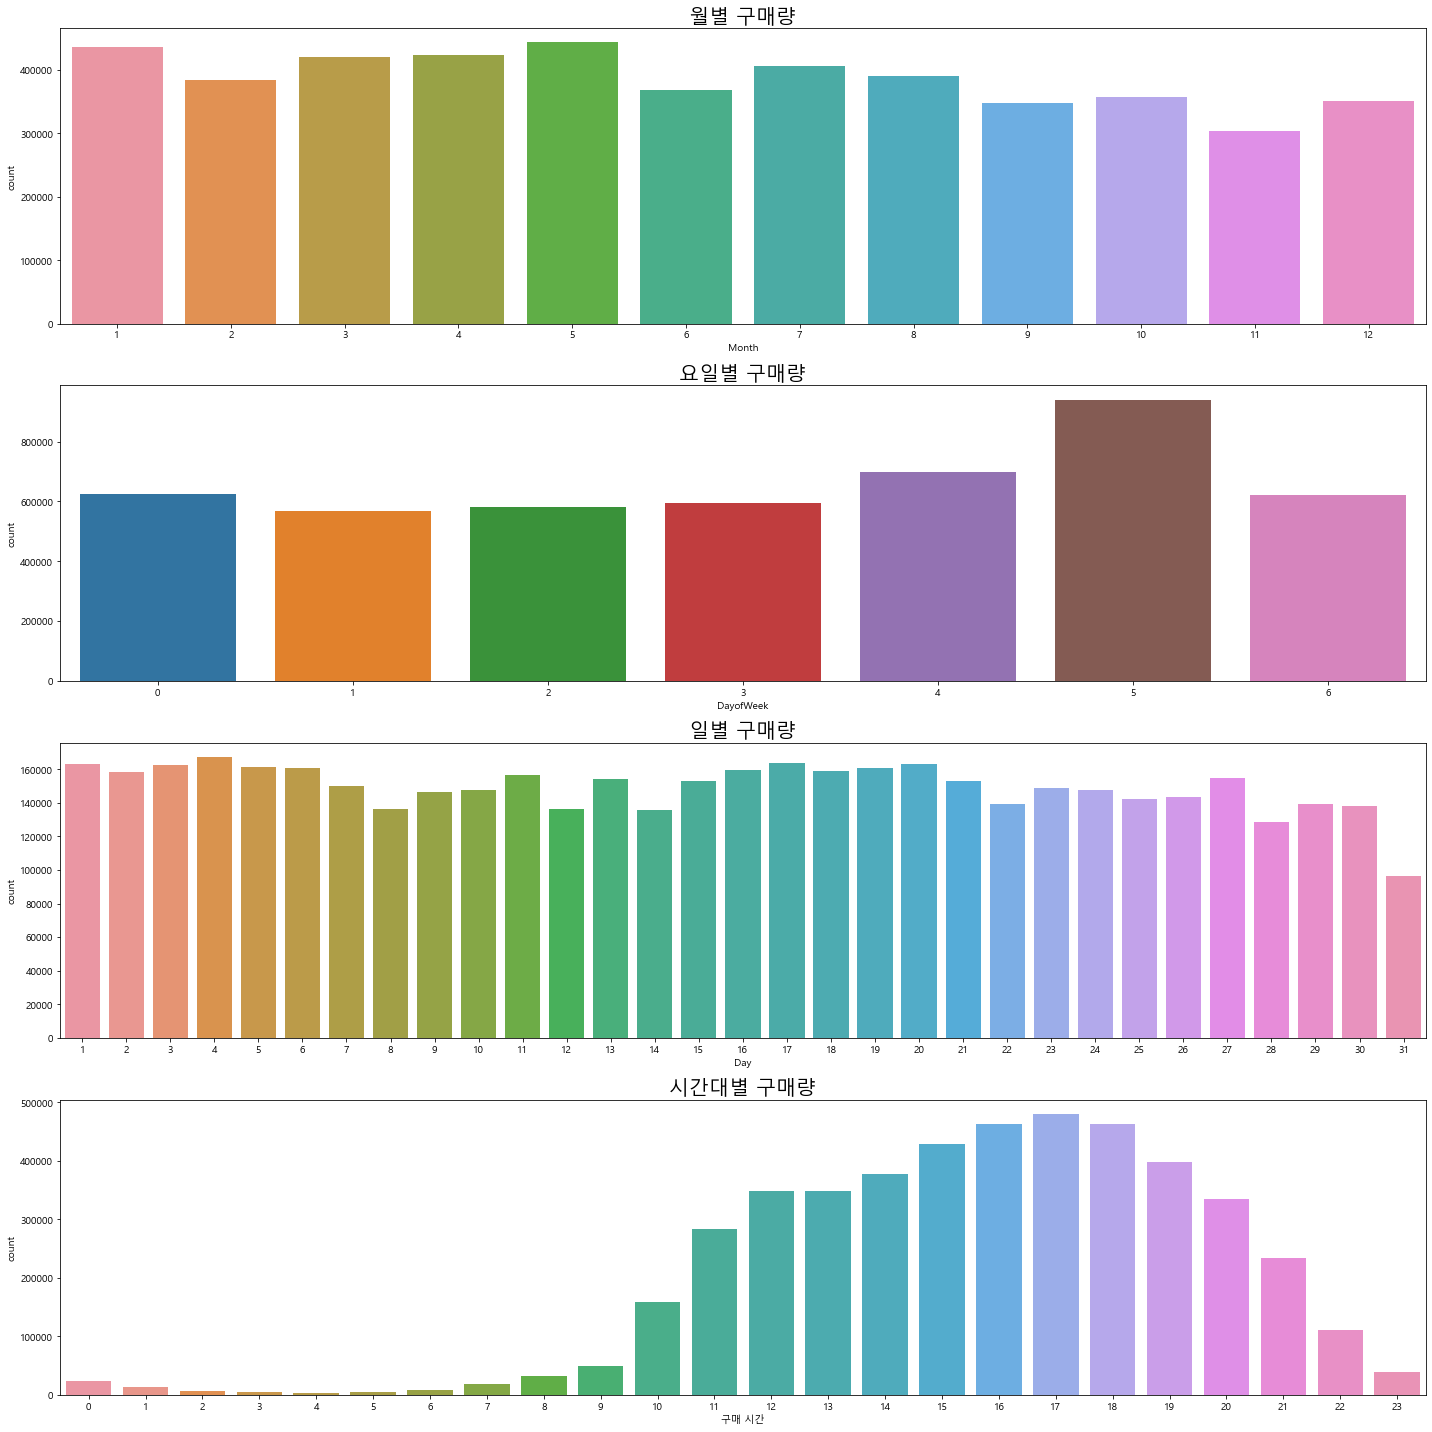

In [54]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(20, 20)

ax1.set_title('월별 구매량', fontsize=20)
sns.countplot(data=data, x='Month', ax=ax1)
ax2.set_title('요일별 구매량', fontsize=20)
sns.countplot(data=data, x='DayofWeek', ax=ax2)
ax3.set_title('일별 구매량', fontsize=20)
sns.countplot(data=data, x='Day', ax=ax3)
ax4.set_title('시간대별 구매량', fontsize=20)
sns.countplot(data=data, x='구매 시간', ax=ax4)

fig.tight_layout()

### 2. 상품 구매 정보 데이터 - 제휴사: 유통

In [55]:
data1['Month'] = data1['구매 일자'].dt.month
data1['DayofWeek'] = data1['구매 일자'].dt.dayofweek
data1['Day'] = data1['구매 일자'].dt.day

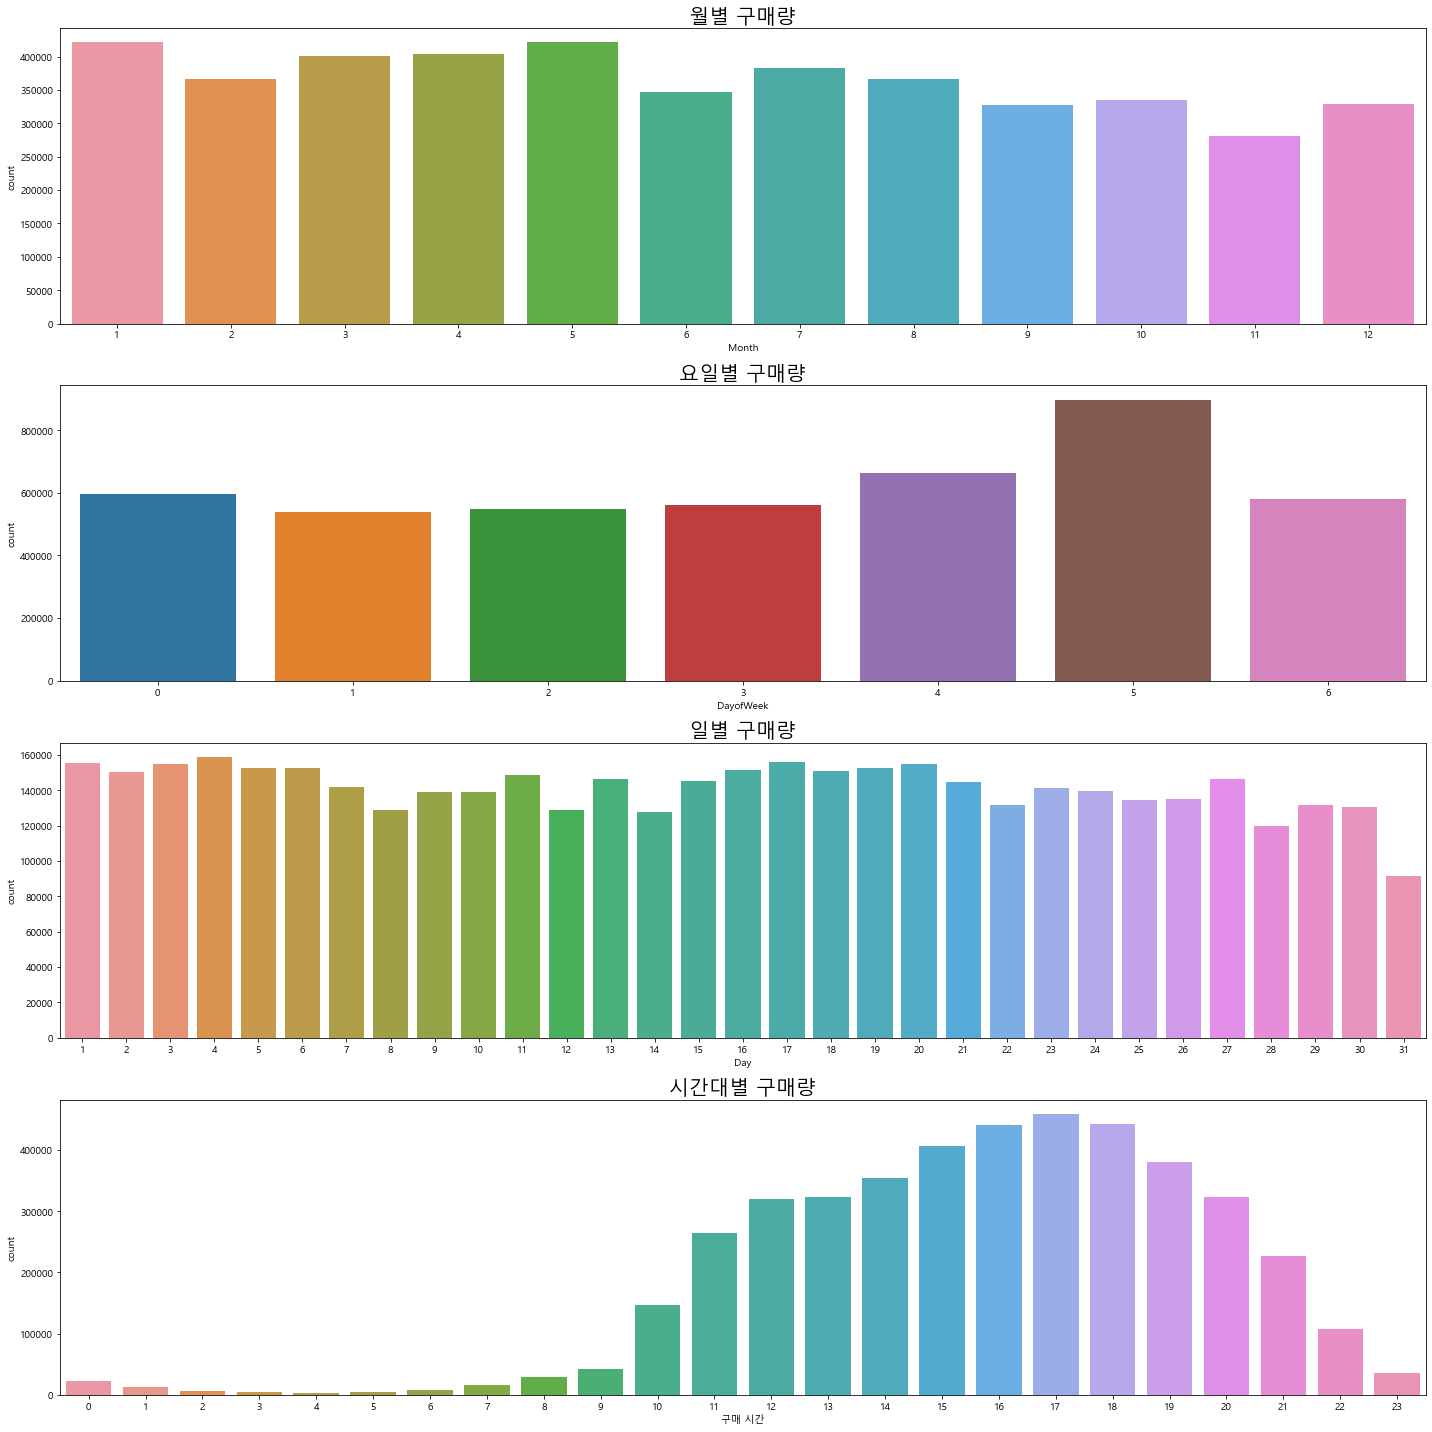

In [56]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(20, 20)

ax1.set_title('월별 구매량', fontsize=20)
sns.countplot(data=data1, x='Month', ax=ax1)
ax2.set_title('요일별 구매량', fontsize=20)
sns.countplot(data=data1, x='DayofWeek', ax=ax2)
ax3.set_title('일별 구매량', fontsize=20)
sns.countplot(data=data1, x='Day', ax=ax3)
ax4.set_title('시간대별 구매량', fontsize=20)
sns.countplot(data=data1, x='구매 시간', ax=ax4)

fig.tight_layout()

### 3. 제휴사 이용 데이터 - 유통 외

In [57]:
data2['Month'] = data2['구매 일자'].dt.month
data2['DayofWeek'] = data2['구매 일자'].dt.dayofweek
data2['Day'] = data2['구매 일자'].dt.day

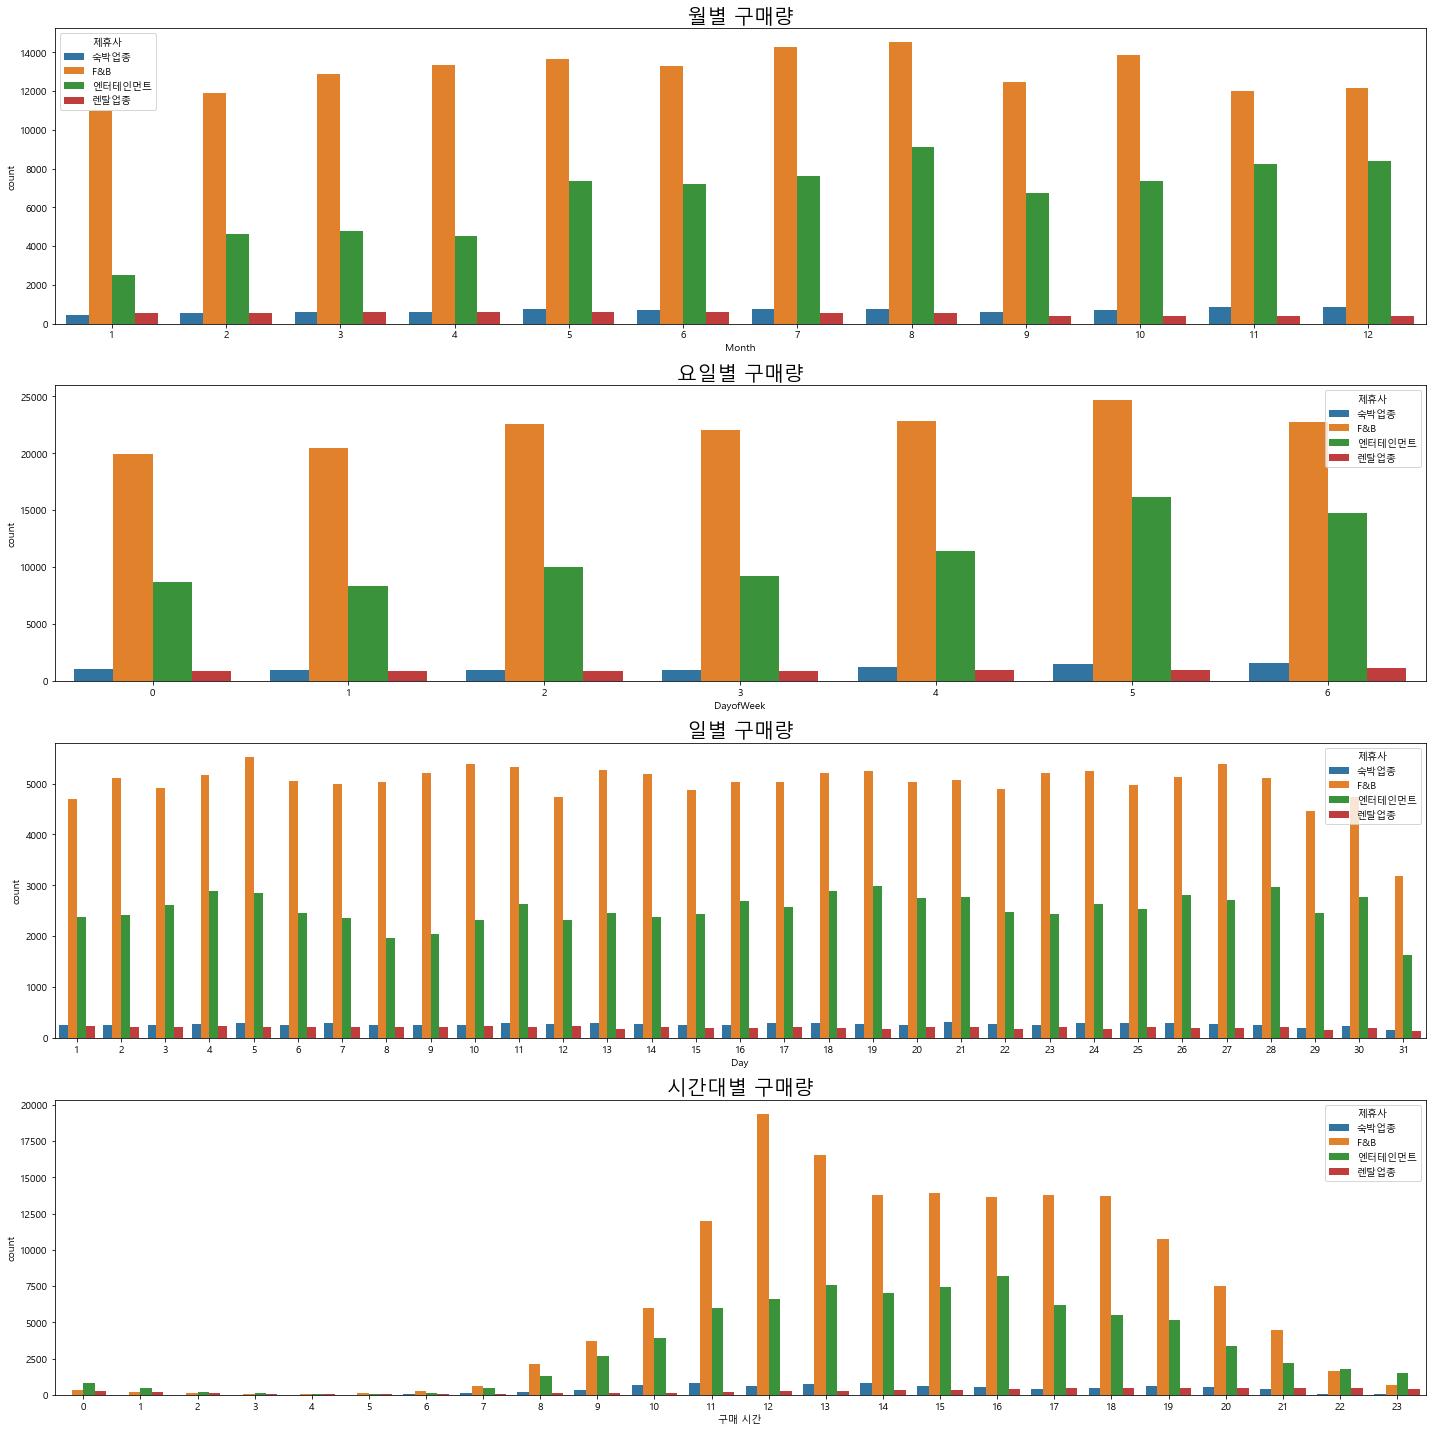

In [58]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(20, 20)

ax1.set_title('월별 구매량', fontsize=20)
sns.countplot(data=data2, x='Month', hue='제휴사', ax=ax1)
ax2.set_title('요일별 구매량', fontsize=20)
sns.countplot(data=data2, x='DayofWeek', hue='제휴사', ax=ax2)
ax3.set_title('일별 구매량', fontsize=20)
sns.countplot(data=data2, x='Day', hue='제휴사', ax=ax3)
ax4.set_title('시간대별 구매량', fontsize=20)
sns.countplot(data=data2, x='구매 시간', hue='제휴사', ax=ax4)

fig.tight_layout()

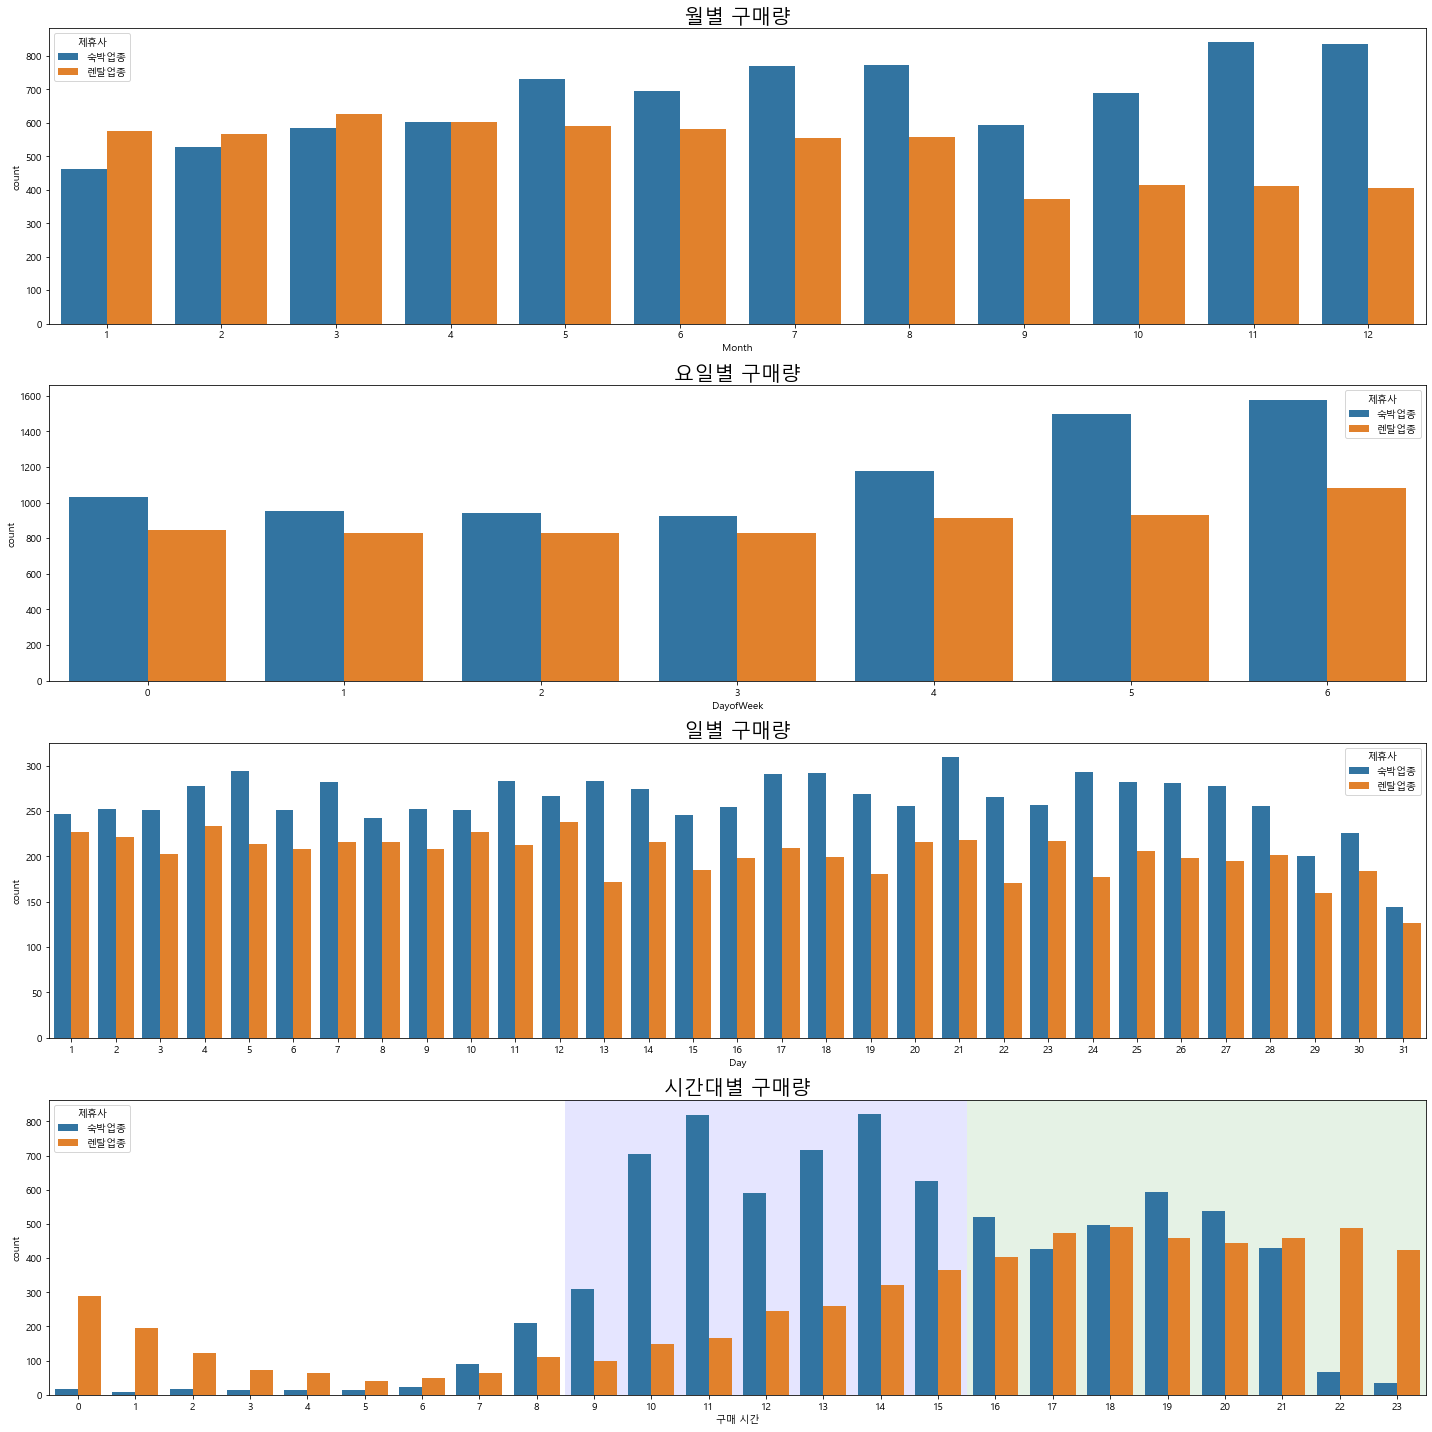

In [59]:
# 숙박업종과 렌탈업종 따로 확인
con = (data2['제휴사']=='숙박업종')|(data2['제휴사']=='렌탈업종')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(20, 20)

ax1.set_title('월별 구매량', fontsize=20)
sns.countplot(data=data2[con], x='Month', hue='제휴사', ax=ax1)
ax2.set_title('요일별 구매량', fontsize=20)
sns.countplot(data=data2[con], x='DayofWeek', hue='제휴사', ax=ax2)
ax3.set_title('일별 구매량', fontsize=20)
sns.countplot(data=data2[con], x='Day', hue='제휴사', ax=ax3)

 # 숙박/렌탈업종 상승구간 표시
ax4.axvspan(8.5, 15.5, facecolor='b', alpha=0.1)
ax4.axvspan(15.5, 24.5, facecolor='g', alpha=0.1)

ax4.set_title('시간대별 구매량', fontsize=20)
sns.countplot(data=data2[con], x='구매 시간', hue='제휴사', ax=ax4)

fig.tight_layout()

## 성별

### 1. 유통

<AxesSubplot:xlabel='고객 성별', ylabel='count'>

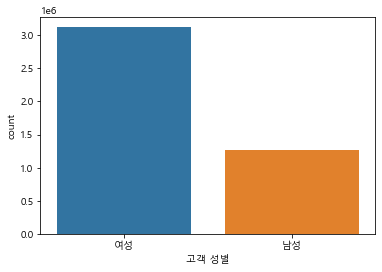

In [60]:
sns.countplot(data=data1, x='고객 성별')

<AxesSubplot:xlabel='고객 연령대', ylabel='Count'>

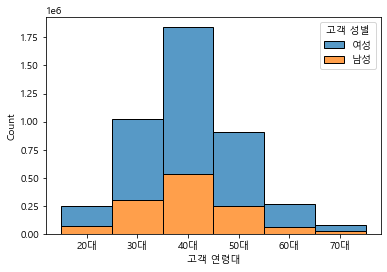

In [61]:
sns.histplot(data=data1.sort_values('고객 연령대'), x='고객 연령대', hue='고객 성별', multiple='stack')

### 2. 유통 외

<AxesSubplot:xlabel='제휴사', ylabel='count'>

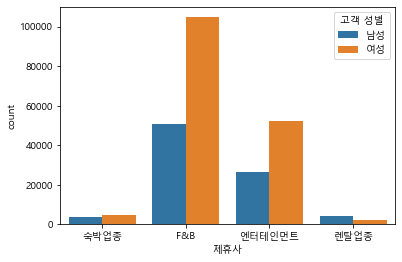

In [62]:
sns.countplot(data=data2, x='제휴사', hue='고객 성별')

## 연령별

### 성별

Text(0, 0.5, '총 구매 횟수')

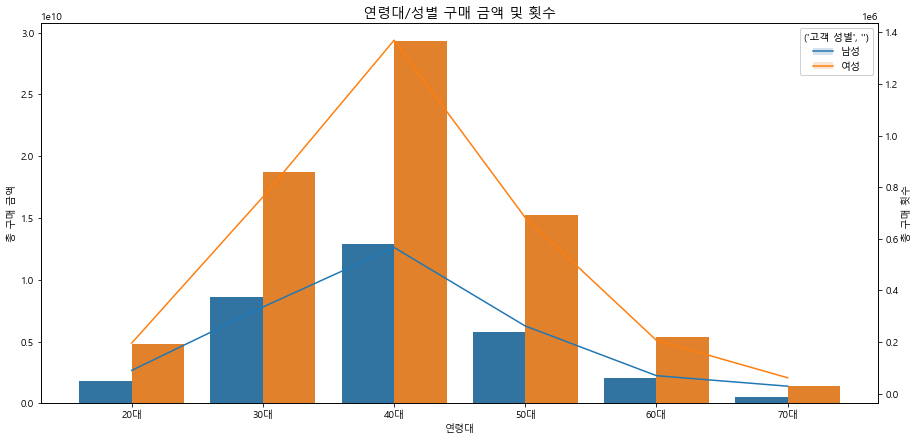

In [63]:
age_df = data.groupby(['고객 성별', '고객 연령대'])[['구매 금액']].agg(['count', 'sum'])
age_df = age_df.reset_index()

fg, ax1 = plt.subplots()
fg.set_size_inches(15, 7)
sns.barplot(data=age_df, x=('고객 연령대', ''), y=('구매 금액', 'sum'), hue=('고객 성별', ''), ax=ax1)


ax2 = ax1.twinx()
sns.lineplot(data=age_df, x=('고객 연령대', ''), y=('구매 금액', 'count'), hue=('고객 성별', ''), ax=ax2)

ax1.set_title('연령대/성별 구매 금액 및 횟수', fontsize=14)
ax1.set_xlabel('연령대')
ax1.set_ylabel('총 구매 금액')
ax2.set_ylabel('총 구매 횟수')

### 제휴사별

In [64]:
data['제휴사'] = data['제휴사 구분 코드'].apply(lambda x: jh[x[0]])

In [65]:
def age_jehue(j):
    if len(j) == 1:
        df = data[data['제휴사']==j[0]]
    elif len(j) == 2:
        df = data[(data['제휴사']==j[0])|(data['제휴사']==j[1])]

    age_df = df.groupby(['제휴사', '고객 연령대'])[['구매 금액']].agg(['count', 'sum'])
    age_df = age_df.reset_index()

    fg, ax1 = plt.subplots()
    fg.set_size_inches(15, 5)
    sns.barplot(data=age_df, x=('고객 연령대', ''), y=('구매 금액', 'sum'), hue=('제휴사', ''), ax=ax1)


    ax2 = ax1.twinx()
    sns.lineplot(data=age_df, x=('고객 연령대', ''), y=('구매 금액', 'count'), hue=('제휴사', ''), ax=ax2)

    ax1.set_title(f'연령대별 구매 금액 및 횟수 - {j}', fontsize=14)
    ax1.set_xlabel('연령대')
    ax1.set_ylabel('총 구매 금액')
    ax2.set_ylabel('총 구매 횟수')

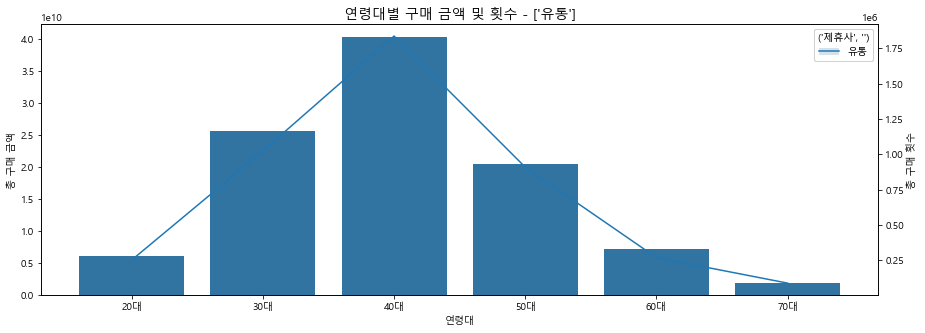

In [66]:
age_jehue(['유통'])

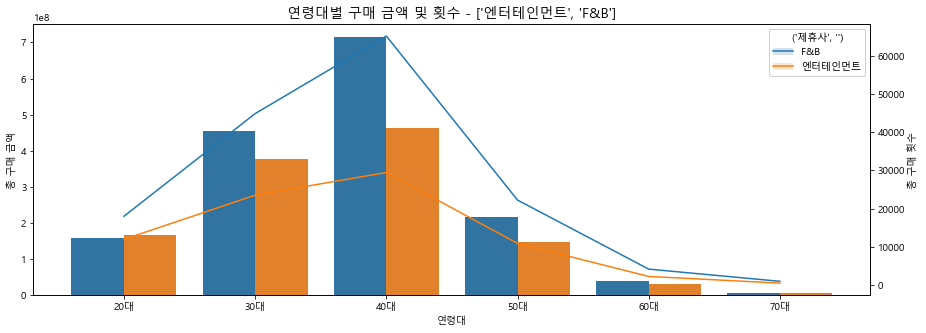

In [67]:
age_jehue(['엔터테인먼트', 'F&B'])

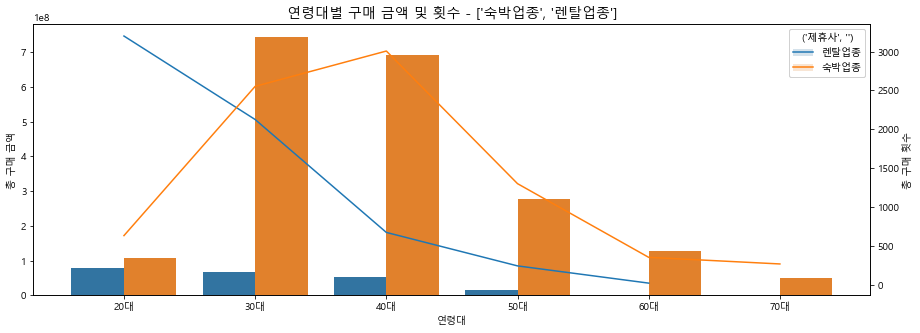

In [68]:
age_jehue(['숙박업종', '렌탈업종'])

In [69]:
def pie_by(target, by):
    df = data2.groupby(by)[target].value_counts().unstack()
    df = df.fillna(0)

    plt.figure(figsize=(20, 10))

    colors = sns.color_palette("Paired", 6)

    for i, a in enumerate(df.index):
        ax = plt.subplot(2, 3, i+1)
        ax.pie(df.loc[a], labels=df.columns, autopct='%.1f%%', colors=colors)
        ax.set_title(a, fontsize=20)

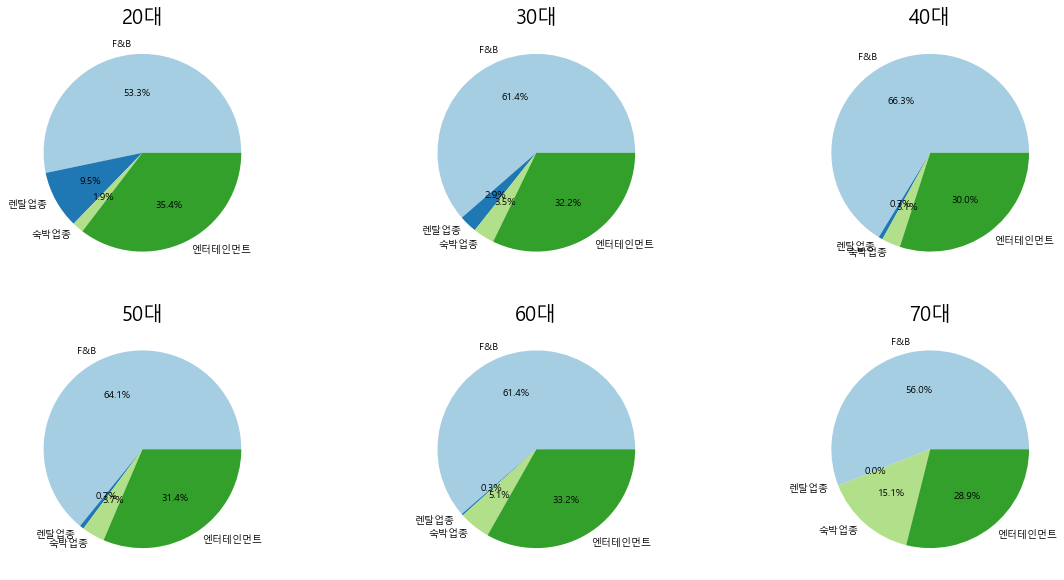

In [70]:
pie_by('제휴사', '고객 연령대')

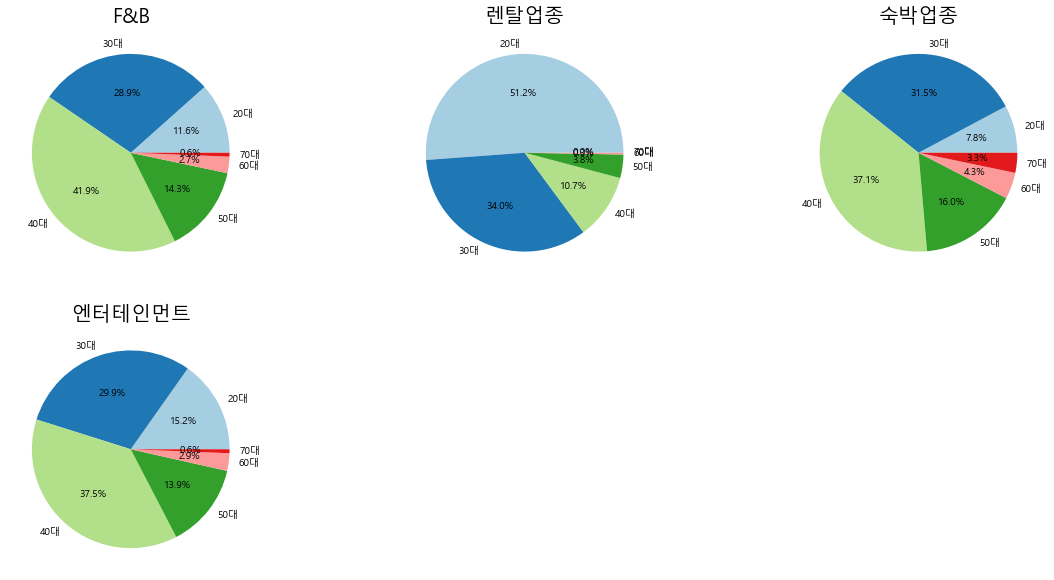

In [71]:
pie_by('고객 연령대', '제휴사')

## 지역

Text(0.5, 1.0, '고객 거주 지역 분포')

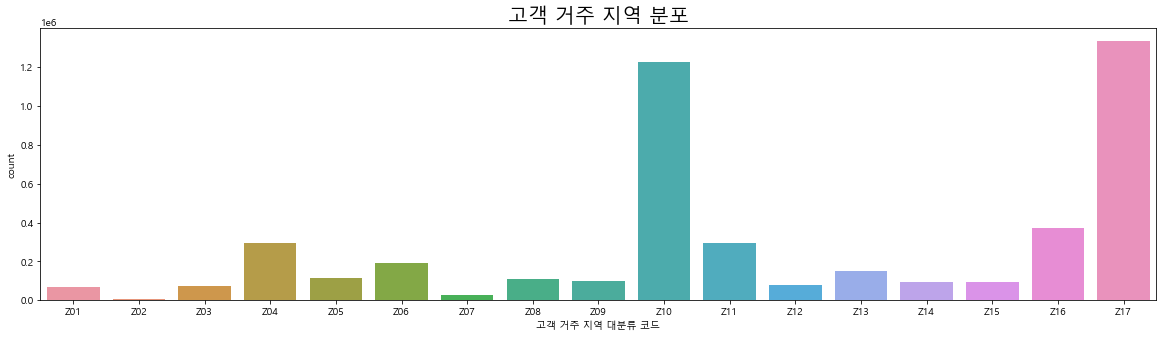

In [72]:
plt.figure(figsize=(20, 5))
sns.countplot(data=data.sort_values('고객 거주 지역 대분류 코드'), x='고객 거주 지역 대분류 코드')
plt.title('고객 거주 지역 분포', fontsize=20)

Text(0.5, 1.0, '점포 지역 분포')

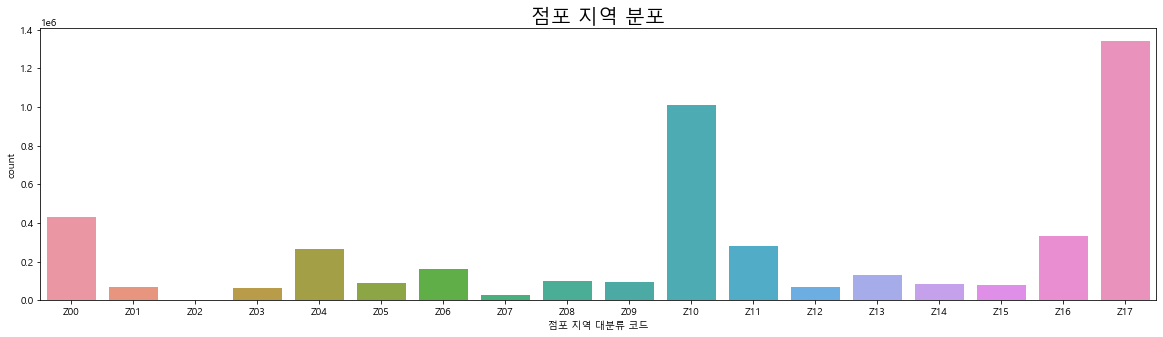

In [73]:
plt.figure(figsize=(20, 5))
sns.countplot(data=data.sort_values('점포 지역 대분류 코드'), x='점포 지역 대분류 코드')
plt.title('점포 지역 분포', fontsize=20)

Text(0.5, 1.0, '고객 거주 지역 분포')

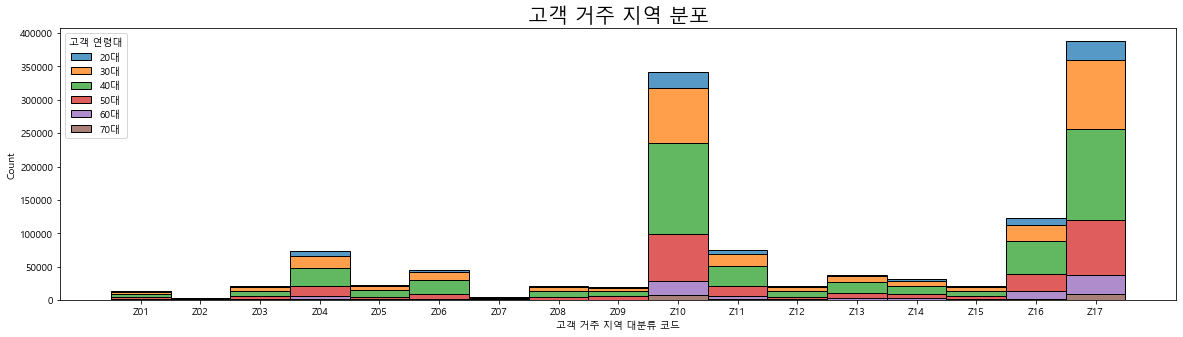

In [74]:
plt.figure(figsize=(20, 5))
sns.histplot(data=df_ut.sort_values('고객 거주 지역 대분류 코드'), x='고객 거주 지역 대분류 코드', hue='고객 연령대', hue_order=['20대', '30대', '40대', '50대', '60대', '70대'], multiple='stack')
plt.title('고객 거주 지역 분포', fontsize=20)

## 상품

Text(0.5, 1.0, '상품 대분류 금액 분포')

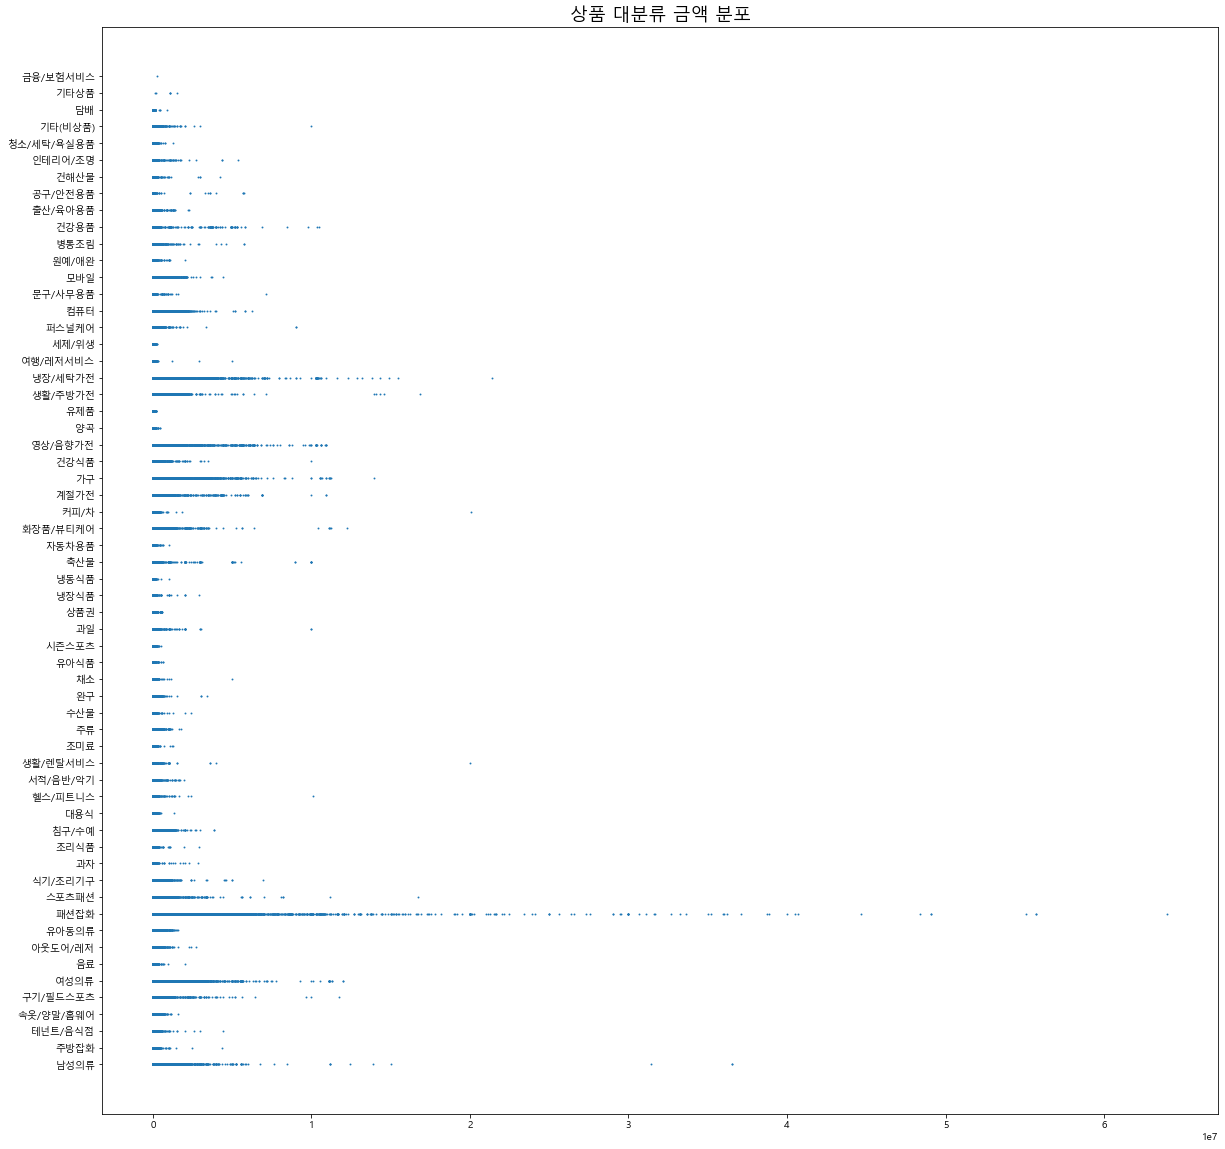

In [75]:
plt.figure(figsize=(20, 20))
plt.scatter(data1['구매 금액'], data1['상품 대분류'], s=0.8)
plt.title('상품 대분류 금액 분포', fontsize=18)

<BarContainer object of 60 artists>

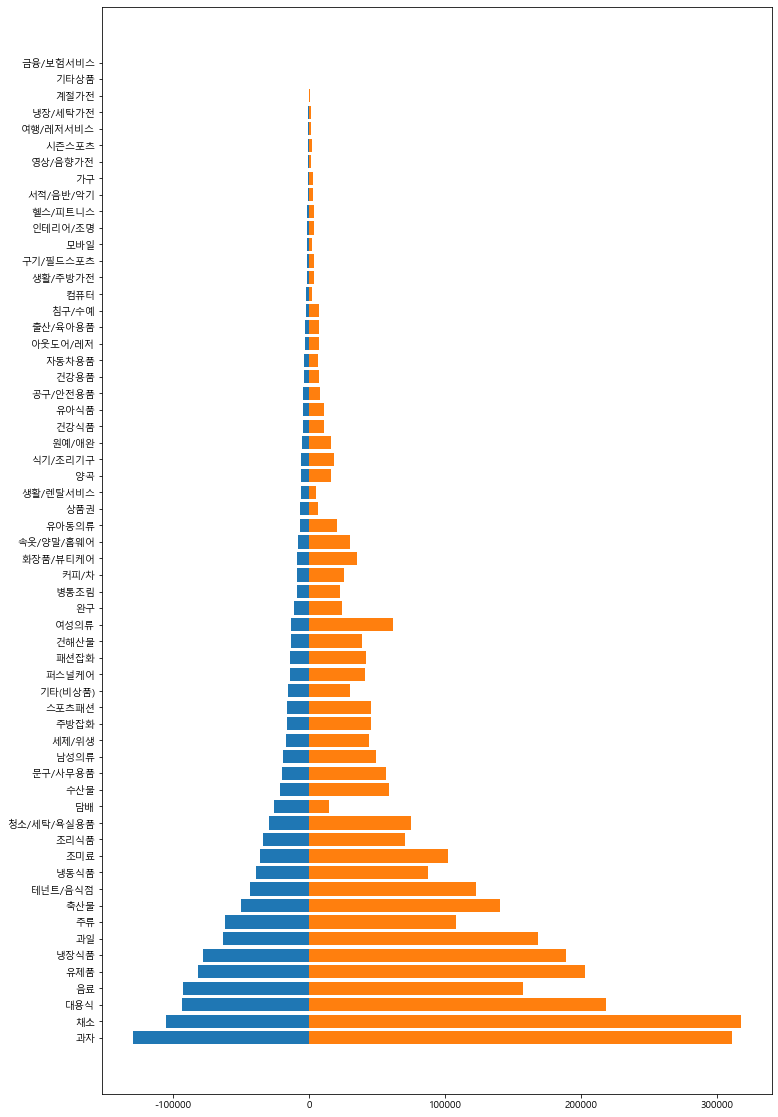

In [76]:
m_merch = data1[data1['고객 성별']=='남성']['상품 대분류'].value_counts()
f_merch = data1[data1['고객 성별']=='여성']['상품 대분류'].value_counts()

m_merch = m_merch.apply(lambda x: -x)

plt.figure(figsize=(12, 20))
plt.barh(m_merch.index, m_merch)
plt.barh(f_merch.index, f_merch)

Text(0.5, 1.0, '상품 대분류 구매수량 분포')

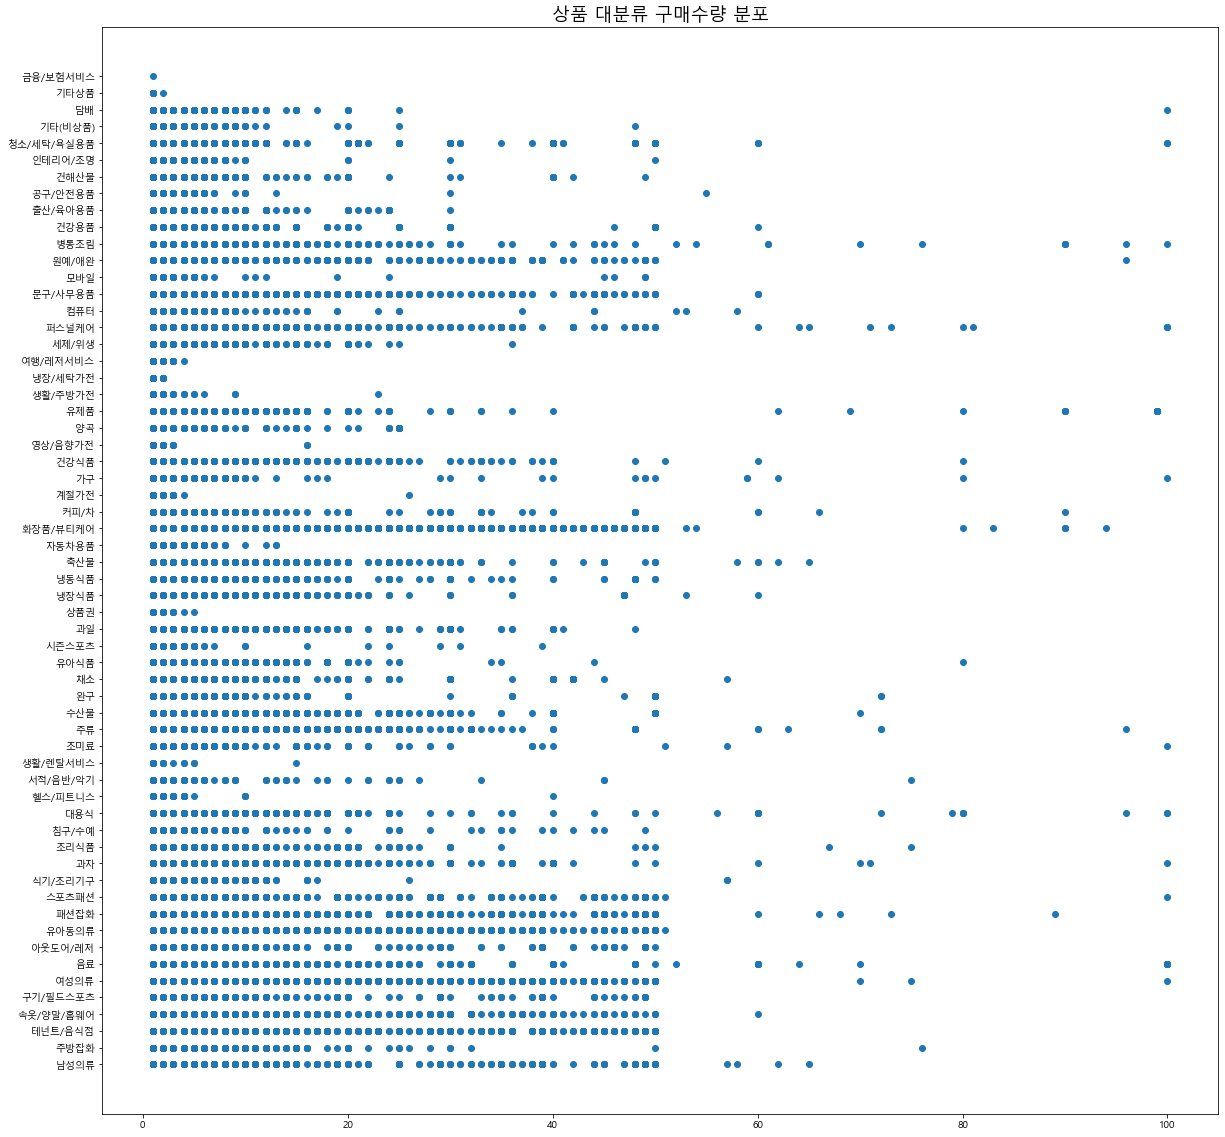

In [77]:
plt.figure(figsize=(20, 20))
plt.scatter(data1['구매 수량'], data1['상품 대분류'])
plt.title('상품 대분류 구매수량 분포', fontsize=18)

<AxesSubplot:xlabel='구매 수량', ylabel='구매 수량'>

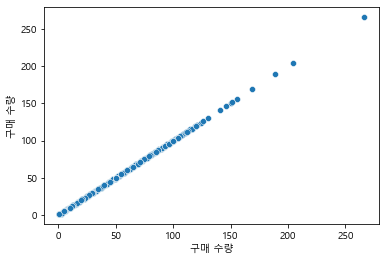

In [78]:
dt_sum = data1.groupby('장바구니 식별 번호')['구매 수량'].sum()
sns.scatterplot(x=dt_sum, y=dt_sum)

## L.POINT 이용 데이터

## 온/오프라인

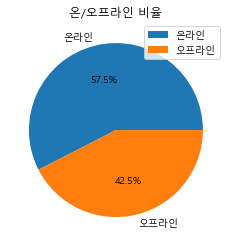

In [79]:
data_on = data3['온/오프라인 구분'].value_counts()
plt.pie(data_on, labels=['온라인', '오프라인'], autopct='%.1f%%')
plt.title('온/오프라인 비율')
plt.legend()
plt.show()

## 제휴사

Text(0.5, 1.0, '제휴사별 L.POINT 이용 총계')

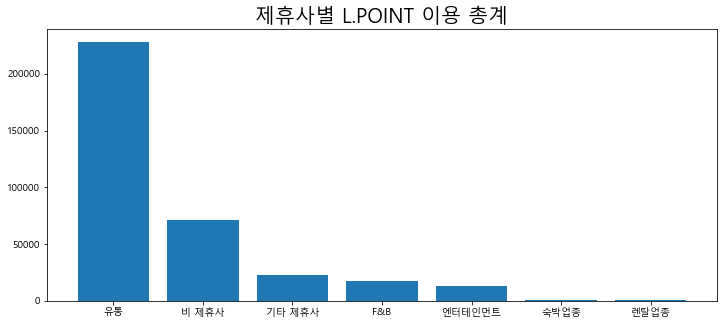

In [80]:
# 이용 총계
data_jh = data3['제휴사 구분'].value_counts()

plt.figure(figsize=(12, 5))
plt.bar(data_jh.index, data_jh)
plt.title('제휴사별 L.POINT 이용 총계', fontsize=20)

Text(0.5, 1.0, '제휴사별 평균 L.POINT 이용금액')

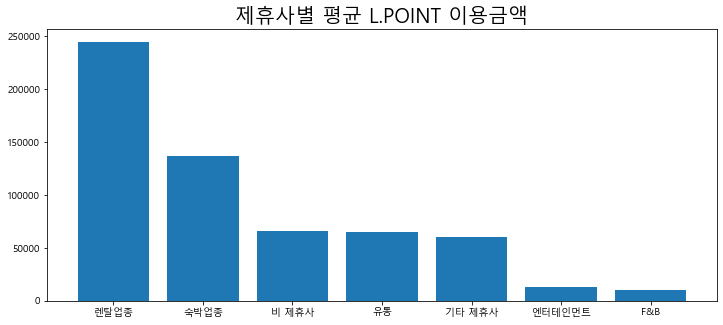

In [81]:
# 평균 이용금액
data_amount = data3.groupby('제휴사 구분')['이용금액'].sum()
data_mean = data_amount//data_jh
data_mean = data_mean.sort_values(ascending=False)

plt.figure(figsize=(12, 5))
plt.bar(data_mean.index, data_mean)
plt.title('제휴사별 평균 L.POINT 이용금액', fontsize=20)

Text(0.5, 1.0, '제휴사별 평균 구매금액')

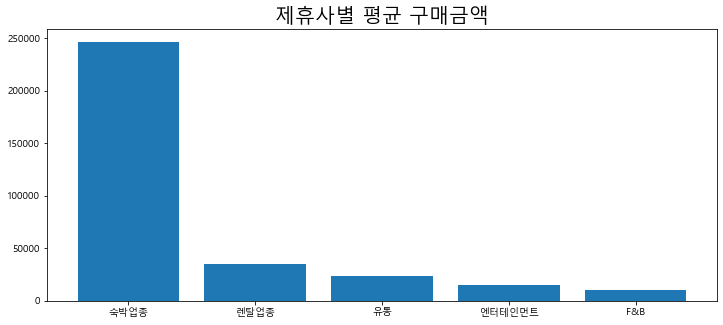

In [82]:
# 평균 이용금액
data_jh_pur = data['제휴사'].value_counts()
data_amount_pur = data.groupby('제휴사')['구매 금액'].sum()
data_mean_pur = data_amount_pur//data_jh_pur
data_mean_pur = data_mean_pur.sort_values(ascending=False)

plt.figure(figsize=(12, 5))
plt.bar(data_mean_pur.index, data_mean_pur)
plt.title('제휴사별 평균 구매금액', fontsize=20)

Text(0.5, 1.0, '구매 데이터 제휴사별 금액 분포')

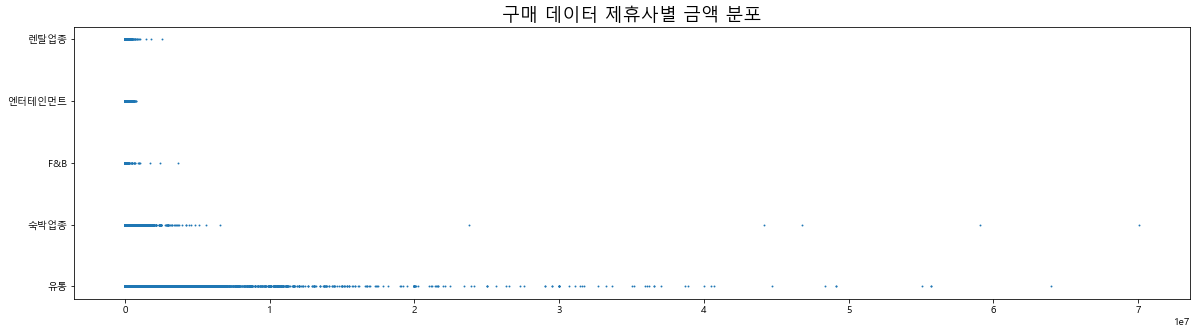

In [83]:
plt.figure(figsize=(20, 5))
plt.scatter(data['구매 금액'], data['제휴사'], s=0.8)
plt.title('구매 데이터 제휴사별 금액 분포', fontsize=18)

Text(0.5, 1.0, 'L.POINT 이용 데이터 제휴사별 금액 분포')

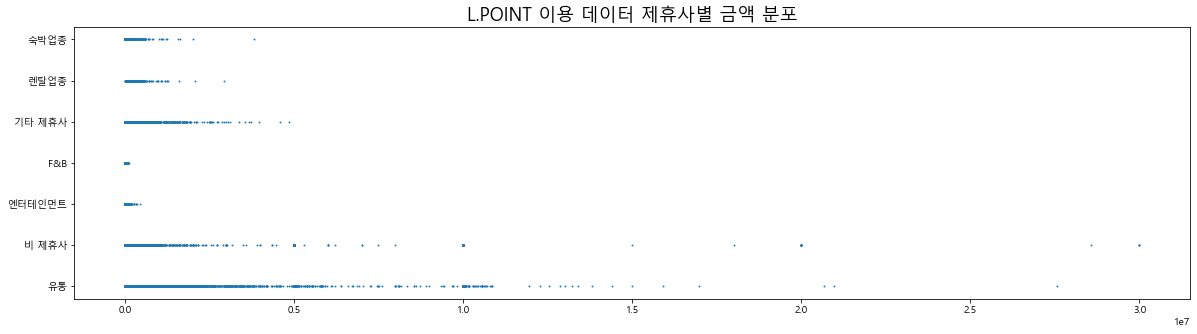

In [84]:
plt.figure(figsize=(20, 5))
plt.scatter(data3['이용금액'], data3['제휴사 구분'], s=0.8)
plt.title('L.POINT 이용 데이터 제휴사별 금액 분포', fontsize=18)

# 3-2. 세부 사항 분석

## 1) 80개 이상 구매 데이터

In [85]:
# 구매수량 80건 이상 데이터
df_outlier = data1.loc[data1['구매 수량'] > 80]

Text(0.5, 1.0, '80개 이상 구매 건 - 상품 대분류')

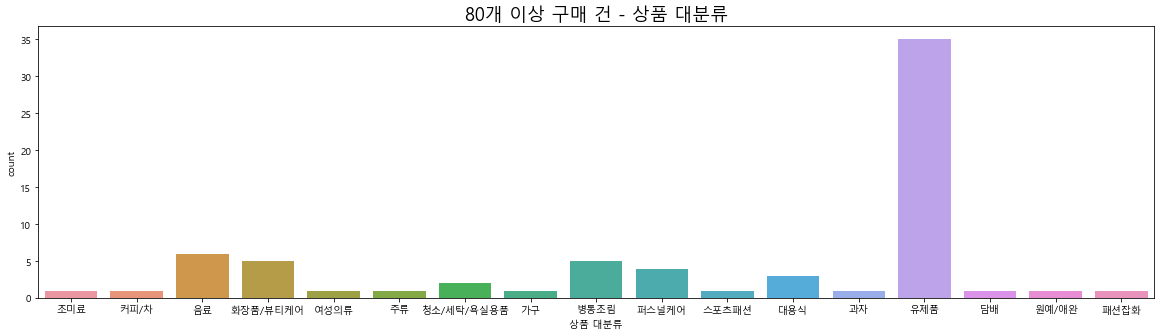

In [86]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df_outlier, x='상품 대분류')
plt.title('80개 이상 구매 건 - 상품 대분류', fontsize=18)

Text(0.5, 1.0, '대량 구매 데이터 - 상품 중분류')

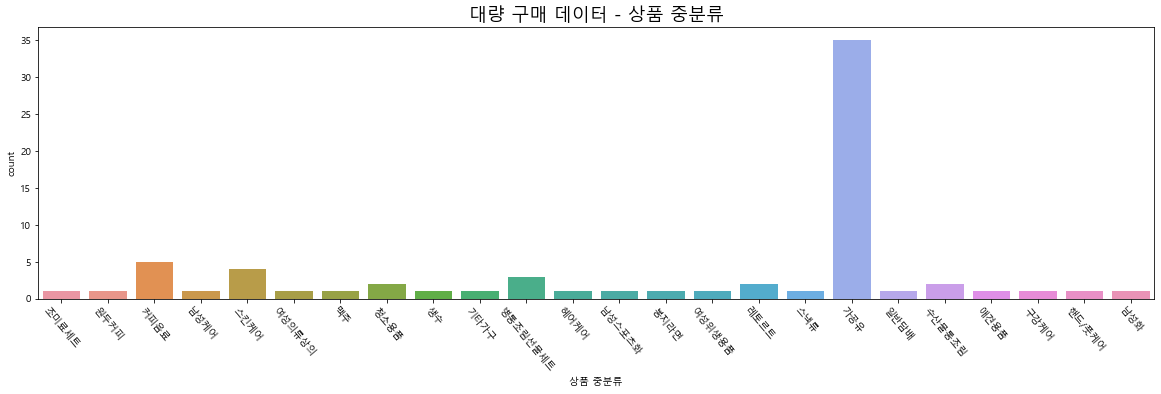

In [87]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=-50)
sns.countplot(data=df_outlier, x='상품 중분류')
plt.title('대량 구매 데이터 - 상품 중분류', fontsize=18)

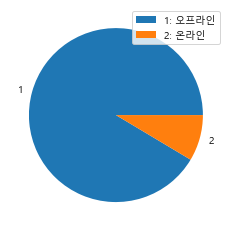

Text(0.5, 1.0, '대량 구매 데이터 - 상품 중분류/온오프')

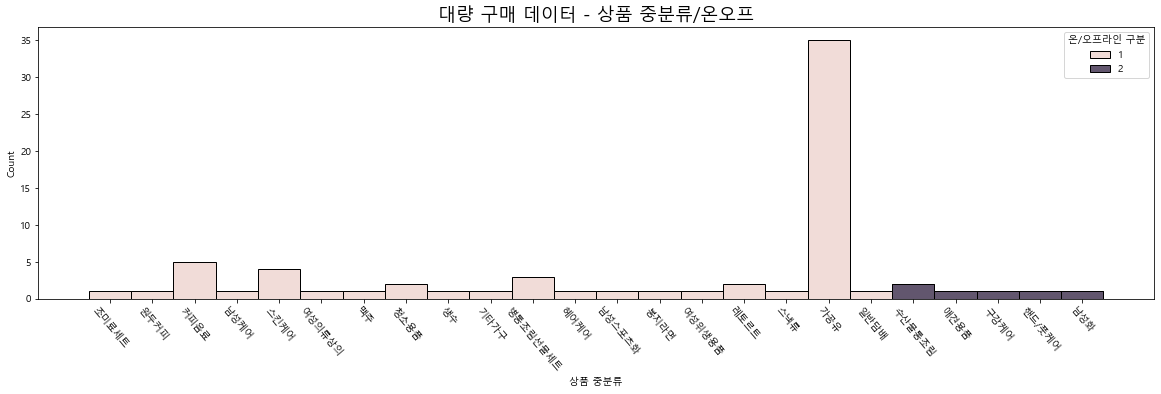

In [88]:
df_ol_onoff = df_outlier['온/오프라인 구분'].value_counts()
plt.pie(df_ol_onoff, labels=df_ol_onoff.index)
plt.legend(['1: 오프라인', '2: 온라인'])
plt.show()

plt.figure(figsize=(20, 5))
plt.xticks(rotation=-50)
sns.histplot(data=df_outlier, x='상품 중분류', hue='온/오프라인 구분', multiple='stack')
plt.title('대량 구매 데이터 - 상품 중분류/온오프', fontsize=18)

Text(0.5, 1.0, '대량 구매 데이터 - 상품 중분류/성별')

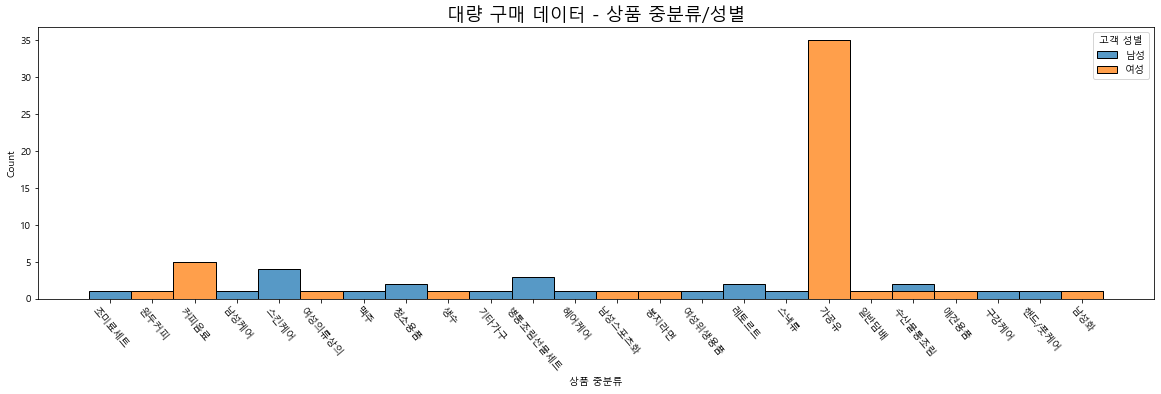

In [89]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=-50)
sns.histplot(data=df_outlier, x='상품 중분류', hue='고객 성별', multiple='stack')
plt.title('대량 구매 데이터 - 상품 중분류/성별', fontsize=18)

In [90]:
df_outlier.loc[df_outlier['상품 중분류']=='가공유'].groupby('고객 분류')['구매 일자'].value_counts()

고객 분류       구매 일자     
M103897322  2021-04-30    17
            2021-11-20     6
            2021-09-11     4
            2021-10-24     4
            2021-10-26     4
Name: 구매 일자, dtype: int64

In [91]:
df_outlier.groupby(['고객 성별', '고객 연령대', '고객 분류'])['상품 중분류'].value_counts().to_frame()

상품 중분류
고객 성별 고객 연령대 고객 분류      상품 중분류          
남성    20대    M035037103 레토르트           2
                        여성위생용품         1
      30대    M035470647 스킨케어           3
             M245283859 청소용품           2
             M308211712 맥주             1
             M927998831 구강케어           1
      40대    M490324209 수산물통조림         1
             M547486357 병통조림선물세트       2
             M552638745 남성케어           1
                        스킨케어           1
             M838622742 조미료세트          1
             M913531244 스낵류            1
             M983850116 병통조림선물세트       1
      60대    M412288994 헤어케어           1
             M745864268 기타가구           1
             M906226236 핸드/풋케어         1
여성    20대    M190157744 애견용품           1
      30대    M347773641 남성화            1
      40대    M037911118 생수             1
             M203489906 원두커피           1
             M282697479 커피음료           5
             M768874888 수산물통조림         1
      50대    M085041421 남성스포츠화         1
             M220751128 여성의류상의         1
             M309668500 봉지라면           1
      60대    M103897322 가공유           35
                        일반담배           1

<AxesSubplot:xlabel='고객 거주 지역 대분류 코드', ylabel='Count'>

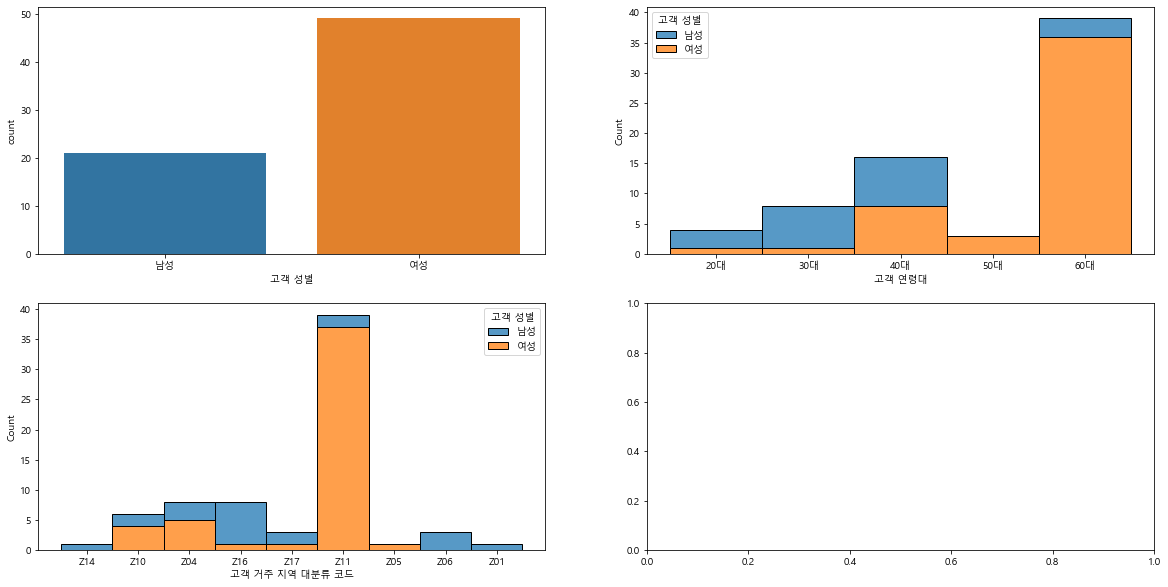

In [92]:
df_ol_cust = df_outlier[['고객 성별', '고객 연령대', '고객 거주 지역 대분류 코드']]

fg, ((ax1, ax2), (ax3, _)) = plt.subplots(2, 2, figsize=(20, 10))

sns.countplot(data=df_ol_cust, x='고객 성별', ax=ax1)
sns.histplot(data=df_outlier.sort_values('고객 연령대'), x='고객 연령대', hue='고객 성별', multiple="stack", ax=ax2)
sns.histplot(data=df_ol_cust, x='고객 거주 지역 대분류 코드', hue='고객 성별', multiple="stack", ax=ax3)

## 2) 30~50대 구매

### 여성

In [93]:
# 유통 데이터
age_con = (df_ut['고객 연령대']=='30대')|(df_ut['고객 연령대']=='40대')|(df_ut['고객 연령대']=='50대')
df_35_f = df_ut.loc[(df_ut['고객 성별']=='여성')&age_con]
df_35_f.head(1)

,고객 분류,장바구니 식별 번호,온/오프라인 구분,제휴사 구분 코드,구매 점포 구분 코드,구매 일자,구매 시간,고객 성별,고객 연령대,고객 거주 지역 대분류 코드,점포 지역 대분류 코드,점포 지역 중분류 코드
0,M430112881,A01000001113,1,A01,A010039,2021-01-01,10,여성,50대,Z17,Z10,Z10042


In [192]:
def onoff_ages(data):
    plt.pie(data['온/오프라인 구분'].value_counts(), labels=['오프라인', '온라인'])
    plt.show()

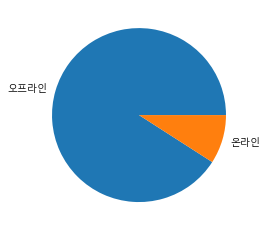

In [193]:
onoff_ages(df_35_f)

In [190]:
# 요일 컬럼 추가
df_35_f['요일'] = df_35_f['구매 일자'].dt.dayofweek

C:\Users\Eugene\AppData\Local\Temp\ipykernel_25280\2397803297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_35_f['요일'] = df_35_f['구매 일자'].dt.dayofweek


<AxesSubplot:title={'center':'30 ~ 50대 요일별 구매량'}, xlabel='요일', ylabel='count'>

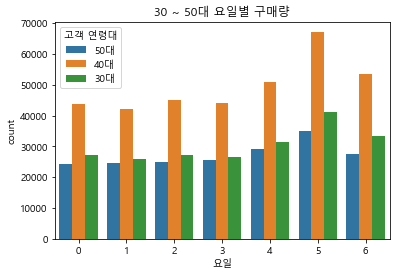

In [143]:
plt.title('30 ~ 50대 요일별 구매량')
sns.countplot(data=df_35_f, x='요일', hue='고객 연령대')

In [182]:
def age_time_wd(data, age):
    df = data.loc[data['고객 연령대']==age].groupby('요일')['구매 시간'].agg(['value_counts']).reset_index()

    plt.figure(figsize=(15, 5))
    pal = sns.color_palette("tab10", 7)
    sns.lineplot(data=df, x='구매 시간', y='value_counts', hue='요일', palette=pal)
    plt.title(f'{age} 요일/시간대별 구매량', fontsize=14)

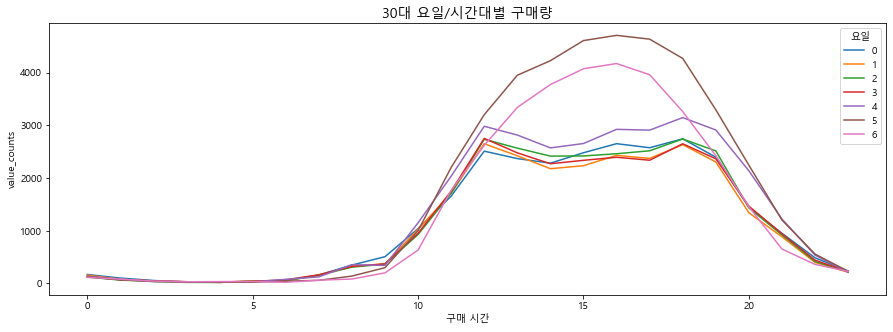

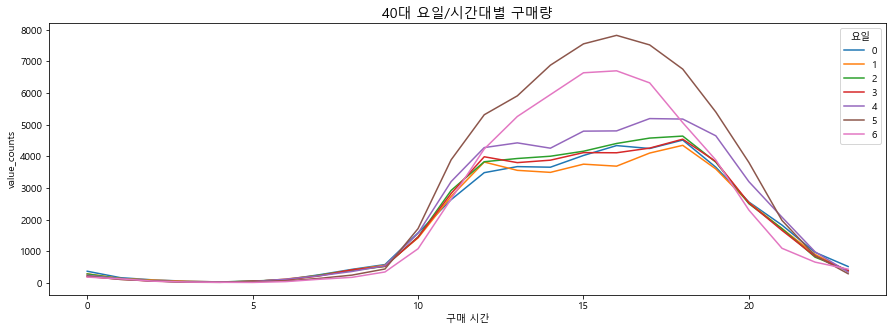

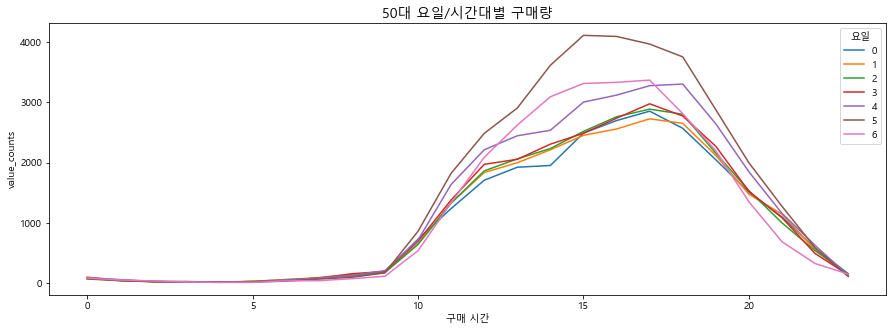

In [183]:
age_time_wd(df_35_f, '30대')
age_time_wd(df_35_f, '40대')
age_time_wd(df_35_f, '50대')

- 30대에서 50대로 갈 수록 평일과 주말의 구매 시간대 차이가 작아진다.

In [202]:
def pr(sex, s, cr):
    df = data1.loc[(data1['고객 성별']==sex)&age_con][s].value_counts().sort_values(ascending=False)
    df = df[:cr]
    plt.figure(figsize=(8, 20))
    plt.barh(df.index, df)
    plt.title(f'30 ~ 50대  구매 상품 - {s}')

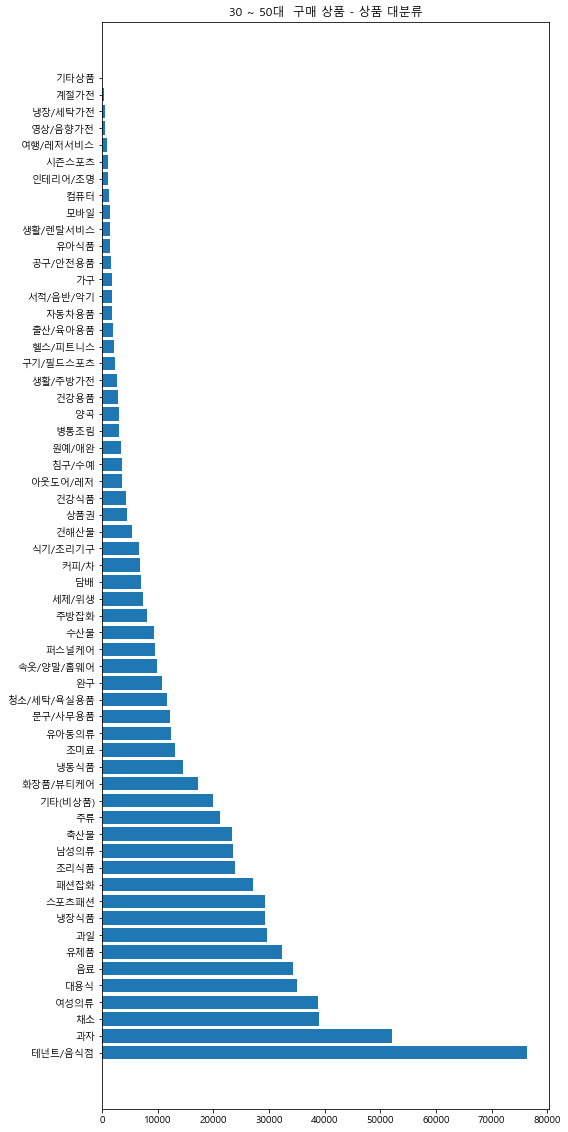

In [203]:
pr('여성', '상품 대분류', -1)

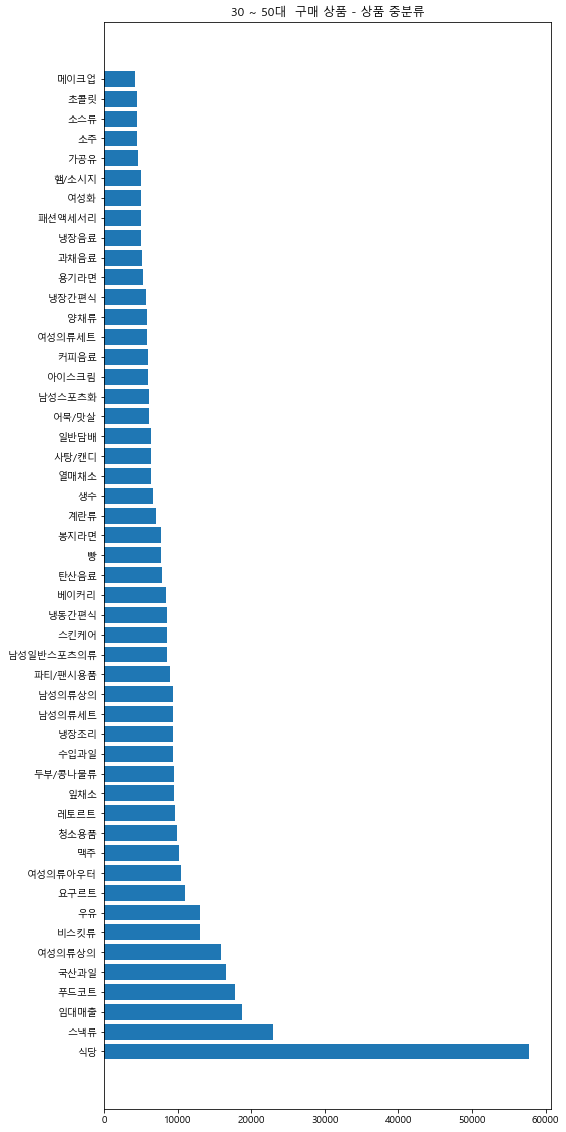

In [204]:
# 상품 중분류 상위 50개
pr('여성', '상품 중분류', 50)

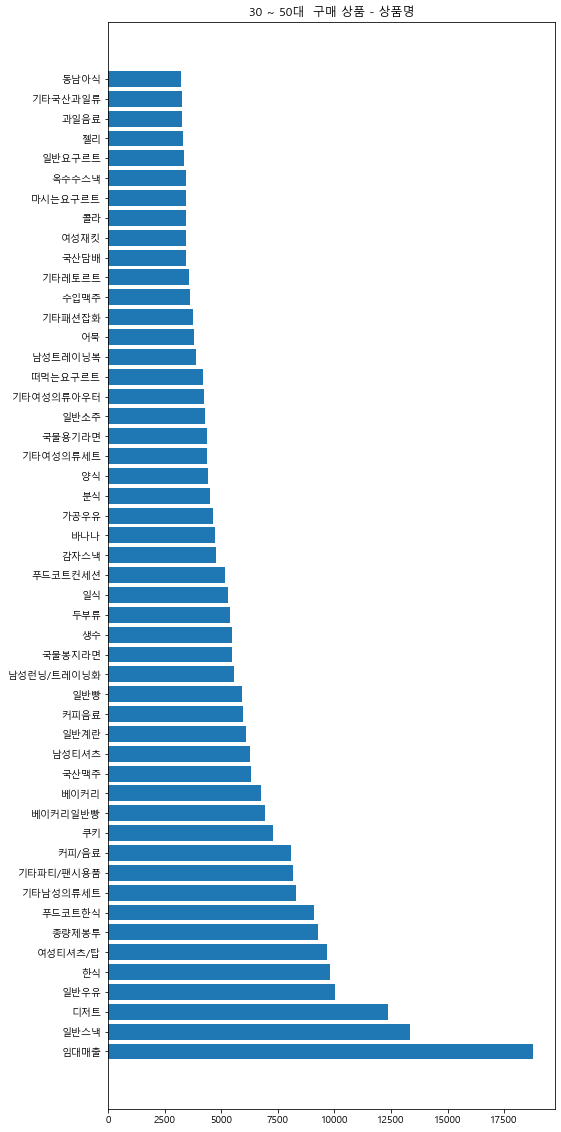

In [205]:
# 상품별 구매량 상위 50개
pr('여성', '상품명', 50)

### + 남성

In [95]:
# 유통 데이터
df_35_m = df_ut.loc[(df_ut['고객 성별']=='남성')&age_con]
df_35_m['요일'] = df_35_m['구매 일자'].dt.dayofweek
df_35_m.head(1)

,고객 분류,장바구니 식별 번호,온/오프라인 구분,제휴사 구분 코드,구매 점포 구분 코드,구매 일자,구매 시간,고객 성별,고객 연령대,고객 거주 지역 대분류 코드,점포 지역 대분류 코드,점포 지역 중분류 코드
27,M878181490,A01000025433,1,A01,A010025,2021-01-01,12,남성,30대,Z13,Z13,Z13001


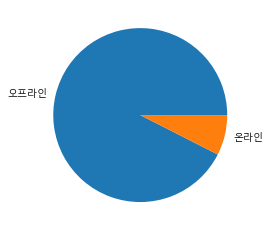

In [194]:
onoff_ages(df_35_m)

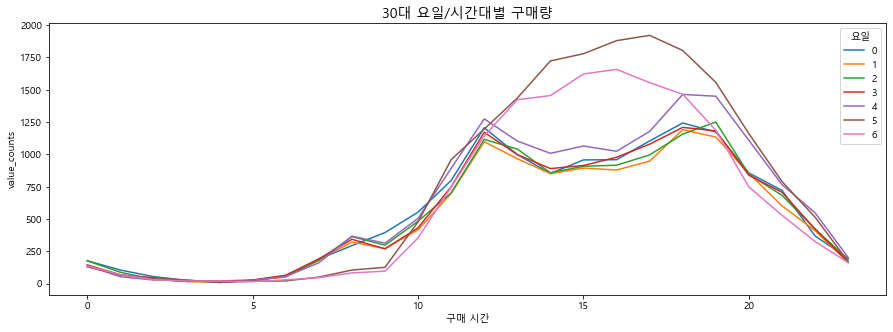

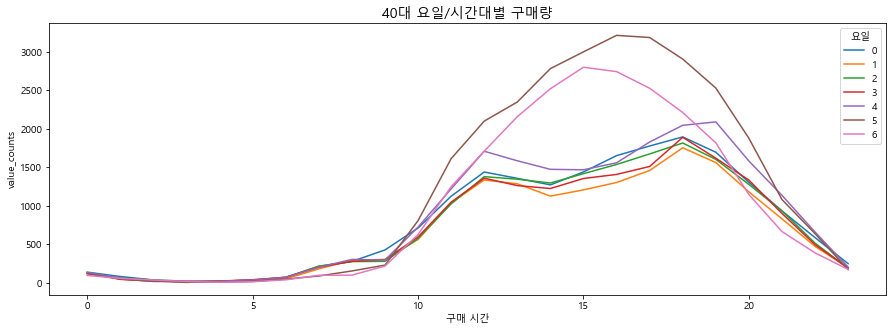

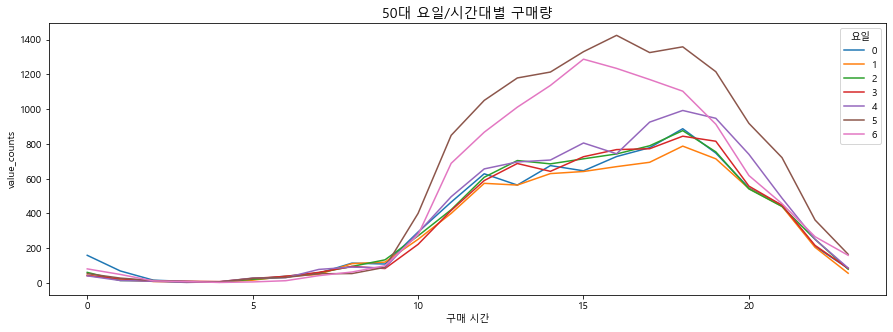

In [186]:
age_time_wd(df_35_m, '30대')
age_time_wd(df_35_m, '40대')
age_time_wd(df_35_m, '50대')

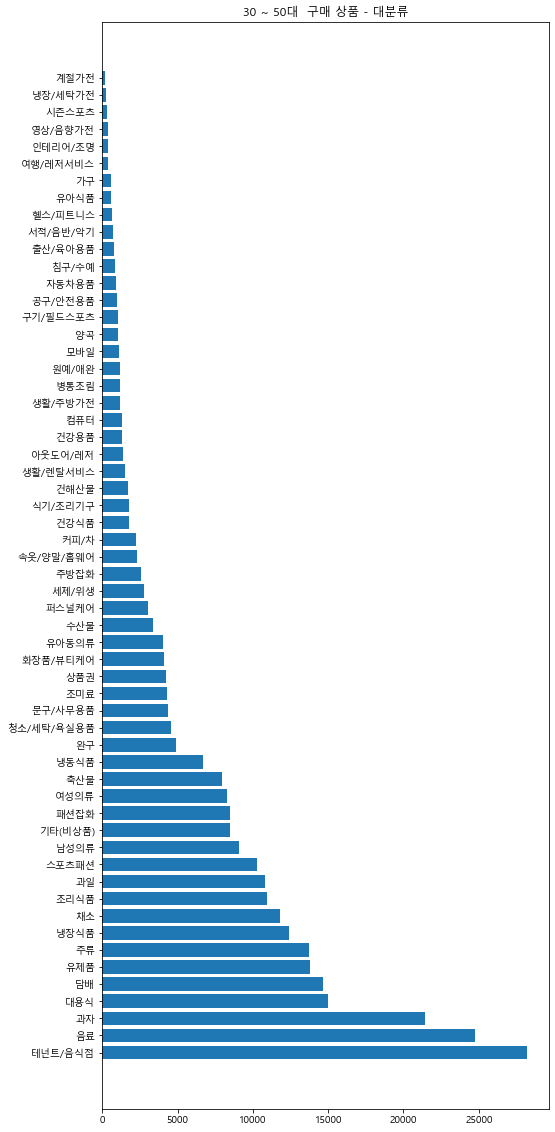

In [199]:
pr('남성', '상품 대분류', -1)

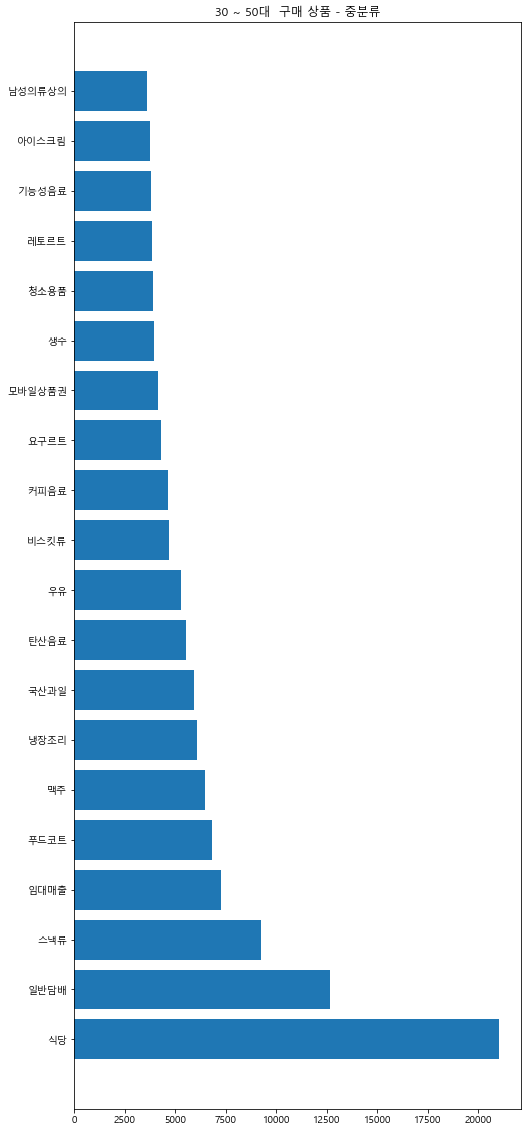

In [201]:
pr('남성', '상품 중분류', 20)